##**Data ingestion**

In [1]:
#Conexión con colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Librerías**

In [167]:
#Librerías
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns # gráficos
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import linear_model ## para regresión lineal
from sklearn import tree ###para ajustar arboles de decisión
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor ##Ensamble con bagging
from sklearn.ensemble import GradientBoostingRegressor ###Ensamble boosting
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt ### gráficos
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer ### para imputación
from sklearn import linear_model ## para regresión lineal
from sklearn import tree ###para ajustar arboles de decisión
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor ##Ensamble con bagging
from sklearn.ensemble import GradientBoostingRegressor ###Ensamble boosting
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt ### gráficos
from sklearn.model_selection import RandomizedSearchCV
import joblib  ### para guardar modelos
import openpyxl
from google.colab import files

In [3]:
#Cargar datos
usuarios = pd.read_csv('/content/drive/Shareddrives/Analítica/NIVEL 3/Salud/RETO_df_usuarios.csv')
egresos = pd.read_csv('/content/drive/Shareddrives/Analítica/NIVEL 3/Salud/RETO_df_egresos.csv')
cronicos = pd.read_csv('/content/drive/Shareddrives/Analítica/NIVEL 3/Salud/RETO_df_cronicos.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,7,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (34,36,39,40,50,52,55,56,58,62,64,65,66,75,107,108,111,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,2

In [4]:
cronicos['YEAR'].unique()

array([2017, 2018, 2021, 2022])

In [5]:
#Separar bases de datos para antes y después de pandemia
cronicos_pre = cronicos[(cronicos['YEAR'] == 2017) | (cronicos['YEAR'] == 2018)]
cronicos_pos = cronicos[(cronicos['YEAR'] == 2021) | (cronicos['YEAR'] == 2022)]

# **Limpieza de datos**

##Base de datos crónicos

###Cronicos pre pandemia

In [6]:
#Observar el porcentaje de nulos de cada base 
shape1 = cronicos_pre.shape
shape2 = cronicos_pos.shape
lista = cronicos_pre.columns
nulos_pre = []
nulos_pos = []
for i in lista:
    nulos_pre.append(cronicos_pre[i].isnull().sum()/shape1[0]*100)
    nulos_pos.append(cronicos_pos[i].isnull().sum()/shape2[0]*100)
    #print(i, "->", nulos_pre, "Pre: ",round((nulos_pre/shape1[0])*100,2), "% | ", nulos_pos, "Pos: ",round((nulos_pos/shape2[0])*100,2), "%")


In [7]:
def percent_null(datos):
    shape = datos.shape
    lista = datos.columns
    for i in lista:
        nulos = datos[i].isnull().sum()
        print(i, "->", nulos, " | ",round((nulos/shape[0])*100,2), "%")


In [8]:
def lista_null(datos):
    shape = datos.shape
    lista = datos.columns
    nulos = []
    for i in lista:
        nulos.append((datos[i].isnull().sum()/shape[0])*100)
    return nulos


In [9]:
cronicos.shape

(38736, 290)

In [10]:
#cronicos_pre.info()
percent_null(cronicos_pre)

YEAR -> 0  |  0.0 %
MES -> 0  |  0.0 %
Fecha diligenciamiento -> 0  |  0.0 %
Hora -> 0  |  0.0 %
Atención -> 0  |  0.0 %
Ingreso -> 0  |  0.0 %
Tipo -> 0  |  0.0 %
NRODOC -> 0  |  0.0 %
Peso -> 0  |  0.0 %
Talla -> 0  |  0.0 %
IMC -> 0  |  0.0 %
Clasificación IMC -> 0  |  0.0 %
Saturación de Oxígeno (%) -> 24  |  0.19 %
Perímetro Muslo -> 0  |  0.0 %
Perímetro Cintura -> 0  |  0.0 %
Pliegue Triceps -> 0  |  0.0 %
Pliegue Abdomen -> 0  |  0.0 %
Pliegue Muslo -> 0  |  0.0 %
Sumatoria Pliegues -> 0  |  0.0 %
Presión Arterial Sistólica -> 0  |  0.0 %
Presión Arterial Diastólica -> 0  |  0.0 %
Frecuencia Cardíaca en reposo -> 0  |  0.0 %
Auto-calificacion Nivel de Ejercicio -> 0  |  0.0 %
Constantes -> 0  |  0.0 %
METS -Índice Metabólico -> 0  |  0.0 %
VO2 - Máxima Cantidad de Oxígeno -> 0  |  0.0 %
Índice de Fragilidad Groningen -> 45  |  0.35 %
Calificación (Índice de Fragilidad) -> 0  |  0.0 %
Tiempo en Segundos (Apoyo Monopodal) -> 0  |  0.0 %
Calificación (Apoyo Monopodal) -> 0  |  0.0

In [11]:
#Mirar las categorías de las variables que tengan más del 30% de nulos
shape = cronicos_pre.shape
lista = cronicos_pre.columns
lista2 = []
for i in lista:
    nulos_pre = (cronicos_pre[i].isnull().sum()/shape[0])*100
    if nulos_pre > 30:
        print(i)
        print(cronicos_pre[i].unique())
        print(round(nulos_pre, 2), "%")
        print('--------------------------')
        lista2.append(i)



Índice Tobillo/Brazo
[nan '0.91 - 1.30 Normal'
 '0.41 - 0.90 Enfermedad arterial periférica leve a moderada'
 '<0.4 EAP Grave']
96.12 %
--------------------------
Observaciones
[nan 'no ha tomado medicamentos'
 'paciente viene sola con dolro en MsIs y NO ha tomado los medicamentos de la PA hoy'
 'no se ha tomado los mdicamentos' 'no se ha tomado lso medicamentos hoy'
 'hoy no ha tomado los medicamentos'
 'la paciente llega agitada por caminata larga' 'venia agitado'
 'Se le hacen 2 tomas de presión arterial y salen alteradas y la paciente refiere que ya se tomo el medicamento'
 'no ha tomado medicamentso desde hace 1 mes opr que se marea'
 'la paciente NO ha tomado medicamentos desde ayer'
 'Se le toma presión arterial 2 veces ya ambas salen alteradas'
 'no ha tomado los medicamentos' 'se le termino el tto ayer'
 'No se le da carnet ya que la señora esta en lista de espera para hacer atendida por domiciliaria.'
 'No se le da carnet ya que esta en espera para ser atendida por domiciliar

In [12]:
for i in lista2:
    cronicos_pre = cronicos_pre.drop(i, axis = 1)

In [13]:
#Eliminar variables que solo tengan datos ND
lista = cronicos_pre.columns
for i in lista:
    var = list(cronicos_pre[i].unique())
    if var[0] == "ND":
        cronicos_pre = cronicos_pre.drop(i, axis = 1)

In [14]:
cronicos_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12827 entries, 0 to 12826
Data columns (total 69 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   YEAR                                       12827 non-null  int64  
 1   MES                                        12827 non-null  object 
 2   Fecha diligenciamiento                     12827 non-null  object 
 3   Hora                                       12827 non-null  object 
 4   Atención                                   12827 non-null  int64  
 5   Ingreso                                    12827 non-null  int64  
 6   Tipo                                       12827 non-null  object 
 7   NRODOC                                     12827 non-null  int64  
 8   Peso                                       12827 non-null  float64
 9   Talla                                      12827 non-null  float64
 10  IMC                   

In [15]:
#Eliminar variables que no se considerarán en el estudio 
cronicos_pre = cronicos_pre.drop(['Hora','Atención','Ingreso', 'Tipo', 'Tiempo en Segundos (Recorrer 5 metros)', 'Fecha Próximo Control','Clasificación Cambio de TFG','Tipo control', 'Análisis y conducta a seguir', 'Constantes', 'Creatinina 1 consulta', 'Tasa de Filtración Glomerular TFG', 'Cambio de TFG', 'Meses de diferencia entre TFG','Remisión'], axis = 1) 

In [16]:
cronicos_pre = cronicos_pre.dropna()

In [17]:
lista = cronicos_pre.columns
for i in lista:
    print(i)
    print(cronicos_pre[i].value_counts())
    print('__________________________')

YEAR
2018    8416
2017    1953
Name: YEAR, dtype: int64
__________________________
MES
DICIEMBRE     1419
NOVIEMBRE     1336
OCTUBRE       1278
MAYO           905
AGOSTO         860
MARZO          832
ENERO          826
FEBRERO        816
JULIO          801
JUNIO          730
SEPTIEMBRE     566
Name: MES, dtype: int64
__________________________
Fecha diligenciamiento
2018-07-23    71
2018-08-13    69
2018-03-26    68
2018-07-30    67
2018-05-28    66
              ..
2018-09-11     4
2018-11-03     3
2018-09-13     3
2017-10-12     2
2018-09-04     2
Name: Fecha diligenciamiento, Length: 288, dtype: int64
__________________________
NRODOC
310577    10
311362    10
311400     9
307533     9
308615     9
          ..
309149     1
311119     1
309835     1
309454     1
311740     1
Name: NRODOC, Length: 2673, dtype: int64
__________________________
Peso
68.0     338
62.0     327
65.0     319
66.0     316
69.0     312
        ... 
666.0      1
158.0      1
56.7       1
72.3       1
6.0    

In [18]:
#Funciones para eliminar filas que se salen de los rangos lógicos en las variables  
def fuera_rango(base,variable,rango):
    base.drop(base.loc[base[variable] > rango ].index, inplace=True)

def fuera_rango_2var(base, var1, var2, rango):
    lista = [var1, var2]
    for i in range(len(lista)):
        base.drop(base.loc[base[lista[i]] > rango ].index, inplace=True)

def fuera_rango_3var(base, var1, var2, var3,rango):
    lista = [var1, var2, var3]
    for i in range(len(lista)):
        base.drop(base.loc[base[lista[i]] > rango ].index, inplace=True)

In [19]:
fuera_rango_3var(cronicos_pre, 'Peso', 'Talla','Frecuencia Cardíaca en reposo', 200)
fuera_rango_2var(cronicos_pre, 'IMC', 'Saturación de Oxígeno (%)', 100)
fuera_rango_3var(cronicos_pre, 'Perímetro Muslo', 'Perímetro Cintura', 'Pliegue Abdomen', 150)
fuera_rango(cronicos_pre, 'Pliegue Triceps', 73)
fuera_rango(cronicos_pre, 'Pliegue Muslo', 90)
fuera_rango_2var(cronicos_pre, 'Hemoglobina Glicada','Glicemia',250)
fuera_rango_2var(cronicos_pre, 'Lipoproteina', 'HDL', 350)
fuera_rango(cronicos_pre, 'Colesterol total', 450)
fuera_rango(cronicos_pre, 'Trigliceridos', 700)
fuera_rango(cronicos_pre, 'Microalbuminuria', 8000)
fuera_rango_2var(cronicos_pre, 'Hormona Estimulante de la Tiroides (TSH)', 'Tasa de Filtración Glomerular TFG2', 900)
fuera_rango(cronicos_pre, 'Ambito según el médico', 'Sin dato')

In [20]:
cronicos_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10206 entries, 0 to 12826
Data columns (total 54 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   YEAR                                       10206 non-null  int64  
 1   MES                                        10206 non-null  object 
 2   Fecha diligenciamiento                     10206 non-null  object 
 3   NRODOC                                     10206 non-null  int64  
 4   Peso                                       10206 non-null  float64
 5   Talla                                      10206 non-null  float64
 6   IMC                                        10206 non-null  float64
 7   Clasificación IMC                          10206 non-null  object 
 8   Saturación de Oxígeno (%)                  10206 non-null  float64
 9   Perímetro Muslo                            10206 non-null  float64
 10  Perímetro Cintura     

In [21]:
#Cambiar tipo de variable
cronicos_pre['Saturación de Oxígeno (%)'] = cronicos_pre['Saturación de Oxígeno (%)'].astype(int)

###Crónicos pos-pandemia

In [22]:
percent_null(cronicos_pos)

YEAR -> 0  |  0.0 %
MES -> 0  |  0.0 %
Fecha diligenciamiento -> 0  |  0.0 %
Hora -> 0  |  0.0 %
Atención -> 0  |  0.0 %
Ingreso -> 0  |  0.0 %
Tipo -> 0  |  0.0 %
NRODOC -> 0  |  0.0 %
Peso -> 0  |  0.0 %
Talla -> 0  |  0.0 %
IMC -> 0  |  0.0 %
Clasificación IMC -> 0  |  0.0 %
Saturación de Oxígeno (%) -> 117  |  0.45 %
Perímetro Muslo -> 0  |  0.0 %
Perímetro Cintura -> 0  |  0.0 %
Pliegue Triceps -> 0  |  0.0 %
Pliegue Abdomen -> 0  |  0.0 %
Pliegue Muslo -> 0  |  0.0 %
Sumatoria Pliegues -> 0  |  0.0 %
Presión Arterial Sistólica -> 0  |  0.0 %
Presión Arterial Diastólica -> 0  |  0.0 %
Frecuencia Cardíaca en reposo -> 0  |  0.0 %
Auto-calificacion Nivel de Ejercicio -> 0  |  0.0 %
Constantes -> 0  |  0.0 %
METS -Índice Metabólico -> 0  |  0.0 %
VO2 - Máxima Cantidad de Oxígeno -> 0  |  0.0 %
Índice de Fragilidad Groningen -> 2  |  0.01 %
Calificación (Índice de Fragilidad) -> 0  |  0.0 %
Tiempo en Segundos (Apoyo Monopodal) -> 0  |  0.0 %
Calificación (Apoyo Monopodal) -> 0  |  0.0

In [23]:
#Mirar las categorías de las variables que tengan más del 30% de nulos
shape = cronicos_pos.shape
lista = cronicos_pos.columns
lista2 = []
for i in lista:
    nulos_pos = (cronicos_pos[i].isnull().sum()/shape[0])*100
    if nulos_pos > 30:
        cronicos_pos = cronicos_pos.drop(i, axis = 1)

In [24]:
cronicos_pos.info()
#cintura es importante porque es un índice predictor de riesgo cardiovascular (riesgo de infarto) mujeres>90cm y hombres>95cm

#sumatoria de pliegues permite mirar el porcentaje de grasa que es predicto a una trombosis, accidente cerebrovascular
#indice tobillo/brazo si puede ser importante , pero es raro que lo tomen 

#HTA hipertensión arterial
#HDL colesterol (grasa buena)

#Eliminar constantes
#tiempo diagnostico1
#Fecha glicemia
#Fecha hemoglobina glicosilada
#Fecha HDL
#Fecha colesterol total
#Fecha trigliceridos
#Fecha creatinina1
#Fecha microalbuminuria 
#Creatinina 1 consulta -> es necesario conservar creatinina 2, el valor más actualizado
#Tasa de Filtración Glomerular TFG -> se deja el 2 porque no estamos evaluando cambios en el tiempo sino causas de hospitalización
#Cambio de TFG
#Meses de diferencia entre TFG
#Remision -> no tenemos información sobre los grupos
#Basiloscopia -> con la fecha no se puede conocer el resultado

#Índice Tobillo/Brazo - es posible que no hayan datos porque no se toman al identificar que el paciente no tiene riesgo de enfermedad vascular periferica

#para las fechas solo es importante mencionar el rango en el que fueron tomados los examenes - verificar que estén en el rango


#el indice tobillo/brazo antes de pandemia no se implementaba comunmente. Con la pandemia aumentó el sedentarismo y el riesgo cardiovascular el cual puede medirse por medio de esta prueba



<class 'pandas.core.frame.DataFrame'>
Int64Index: 25909 entries, 12827 to 38735
Data columns (total 85 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   YEAR                                       25909 non-null  int64  
 1   MES                                        25909 non-null  object 
 2   Fecha diligenciamiento                     25909 non-null  object 
 3   Hora                                       25909 non-null  object 
 4   Atención                                   25909 non-null  int64  
 5   Ingreso                                    25909 non-null  int64  
 6   Tipo                                       25909 non-null  object 
 7   NRODOC                                     25909 non-null  int64  
 8   Peso                                       25909 non-null  float64
 9   Talla                                      25909 non-null  float64
 10  IMC               

In [25]:
cronicos_pos = cronicos_pos.drop(['Diagnostico1', 'NombreDiagnostico1', 'Tipo control', 'Análisis y conducta a seguir', 'Constantes', 'Tiempo con el diagnóstico1', 'Fecha glicemia', 'Fecha hemoglobina glicosilada', 'Fecha HDL', 'Fecha colesterol total', 'Fecha trigliceridos', 'Fecha creatinina1', 'Fecha microalbuminuria', 'Creatinina 1 consulta', 'Tasa de Filtración Glomerular TFG', 'Cambio de TFG', 'Meses de diferencia entre TFG','Remisión', 'Basciloscopia'], axis = 1) 

In [26]:
cronicos_pos = cronicos_pos.dropna()

In [27]:
#Variables que están en pos pandemia y no en pre pandemia
lista = cronicos_pre.columns
lista2 = cronicos_pos.columns
lista3 = []
for i in lista2:
    if i not in lista:
        lista3.append(i)
lista3

#Todo pospandemia aumentó, existe la necesidad de hacer más controles y pruebas médicas. 
#También es posible que muchas personas sintieron la necesidad de ir al médico a raíz de la pandemia

['Hora',
 'Atención',
 'Ingreso',
 'Tipo',
 'Tiempo en Segundos (Recorrer 5 metros)',
 'Índice Tobillo/Brazo',
 'Control HTA',
 'Tiene riesgo de tener HTA',
 'Cuantos cigarrillos día',
 'Años de Consumo',
 'Clasificación de Framinghan',
 'Tiene próximo control',
 'Fecha Próximo Control',
 'Requiere cita de morbilidad']

In [28]:
cronicos_pos.shape

(16373, 66)

In [29]:
lista = cronicos_pos.columns
for i in lista:
    print(i)
    print(cronicos_pos[i].value_counts())
    print('__________________________')

YEAR
2021    10065
2022     6308
Name: YEAR, dtype: int64
__________________________
MES
MARZO         2368
FEBRERO       2277
MAYO          1756
ABRIL         1491
ENERO         1409
AGOSTO        1224
OCTUBRE       1154
DICIEMBRE     1103
NOVIEMBRE     1054
SEPTIEMBRE     942
JULIO          882
JUNIO          713
Name: MES, dtype: int64
__________________________
Fecha diligenciamiento
2021-10-28    96
2022-03-10    95
2021-10-27    94
2022-03-23    90
2021-12-06    89
              ..
2021-08-15     1
2021-01-03     1
2021-09-12     1
2021-10-17     1
2021-01-01     1
Name: Fecha diligenciamiento, Length: 476, dtype: int64
__________________________
Hora
11:12:08 a.m.    334
10:24:21 a.m.      5
9:33:06 a.m.       5
9:38:58 a.m.       5
12:30:28 p.m.      5
                ... 
7:47:14 a.m.       1
8:05:05 a.m.       1
8:07:26 a.m.       1
8:13:52 a.m.       1
11:25:39 p.m.      1
Name: Hora, Length: 13808, dtype: int64
__________________________
Atención
3890126    15
5194451    14

In [30]:
#Cambiar tipo de variable
cronicos_pos['Cuantos cigarrillos día'] = cronicos_pos['Cuantos cigarrillos día'].astype(int)
cronicos_pos['Años de Consumo'] = cronicos_pos['Años de Consumo'].astype(int)
cronicos_pos['Saturación de Oxígeno (%)'] = cronicos_pos['Saturación de Oxígeno (%)'].astype(int)

In [31]:
#Eliminar filas de las variables que están fuera un rango lógico
fuera_rango_2var(cronicos_pos, 'Glicemia', 'Trigliceridos', 1000) #en glicemia #En pre se coloco 250, trigliceridos # En el pre pandemia se coloco 700 pero se eliminarian muchos 
fuera_rango_2var(cronicos_pos, 'Cuantos cigarrillos día', 'Años de Consumo', 90)
fuera_rango_2var(cronicos_pos, 'Lipoproteina', 'HDL', 350)
fuera_rango(cronicos_pos, 'Colesterol total', 450)
fuera_rango(cronicos_pos, 'Hormona Estimulante de la Tiroides (TSH)', 400)
fuera_rango(cronicos_pos, 'Tasa de Filtración Glomerular TFG2', 270)

In [32]:
#Variables no relevantes para el estudio
cronicos_pos = cronicos_pos.drop(['Fecha diligenciamiento', 'Hora','Atención','Ingreso', 'Tipo','Tiempo en Segundos (Recorrer 5 metros)','Fecha Próximo Control','Fecha diligenciamiento'], axis = 1) 

In [33]:
cronicos_pos.dtypes

YEAR                                           int64
MES                                           object
NRODOC                                         int64
Peso                                         float64
Talla                                        float64
IMC                                          float64
Clasificación IMC                             object
Saturación de Oxígeno (%)                      int64
Perímetro Muslo                              float64
Perímetro Cintura                            float64
Pliegue Triceps                              float64
Pliegue Abdomen                              float64
Pliegue Muslo                                float64
Sumatoria Pliegues                           float64
Presión Arterial Sistólica                     int64
Presión Arterial Diastólica                    int64
Frecuencia Cardíaca en reposo                  int64
Auto-calificacion Nivel de Ejercicio           int64
METS -Índice Metabólico                      f

##Base de datos usuarios 

In [34]:
usuarios = usuarios.drop('DEPARTAMENTO', axis = 1)
#Se elimina la variable departamento porque en pre pandemia todos los datos son nulos y pos pandemia todos son de Antioquia

In [35]:
usuarios['FECHA NACIMIENTO'] = pd.to_datetime(usuarios['FECHA NACIMIENTO'], errors = 'coerce', format = '%Y-%m-%d')

In [36]:
usuarios.dtypes

MES                                      object
YEAR                                      int64
NRODOC                                    int64
SEXO                                     object
FECHA NACIMIENTO                 datetime64[ns]
EDAD                                    float64
MUNICIPIO                                object
BARRIO                                   object
FECHA INICIO AL PGP                      object
FECHA PRIMERA CLASE FUNCIONAL            object
PRIMERA CLASE FUNCIONAL                  object
FECHA ÚLTIMA CLASE FUNCIONAL             object
ÚLTIMA CLASE FUNCIONAL                   object
CICLO_VITAL                              object
QUINQUENIO                               object
dtype: object

In [37]:
usuarios_pre = usuarios[(usuarios['YEAR'] == 2017) | (usuarios['YEAR'] == 2018)]
usuarios_pos = usuarios[(usuarios['YEAR'] == 2021) | (usuarios['YEAR'] == 2022)]

###Usuarios pre pandemia

In [38]:
percent_null(usuarios_pre)

MES -> 0  |  0.0 %
YEAR -> 0  |  0.0 %
NRODOC -> 0  |  0.0 %
SEXO -> 10  |  0.01 %
FECHA NACIMIENTO -> 72080  |  71.02 %
EDAD -> 34156  |  33.65 %
MUNICIPIO -> 101490  |  100.0 %
BARRIO -> 37052  |  36.51 %
FECHA INICIO AL PGP -> 58253  |  57.4 %
FECHA PRIMERA CLASE FUNCIONAL -> 94832  |  93.44 %
PRIMERA CLASE FUNCIONAL -> 93439  |  92.07 %
FECHA ÚLTIMA CLASE FUNCIONAL -> 94832  |  93.44 %
ÚLTIMA CLASE FUNCIONAL -> 54992  |  54.18 %
CICLO_VITAL -> 34156  |  33.65 %
QUINQUENIO -> 34156  |  33.65 %


In [39]:
def meses(nombre_mes):
    nombre_mes = nombre_mes.upper()
    if nombre_mes == "ENERO":
        mes = 1
    elif nombre_mes == "FEBRERO":
        mes = 2
    elif nombre_mes == "MARZO":
        mes = 3
    elif nombre_mes == "ABRIL":
        mes = 4
    elif nombre_mes == "MAYO":
        mes = 5
    elif nombre_mes == "JUNIO":
        mes = 6
    elif nombre_mes == "JULIO":
        mes = 7
    elif nombre_mes == "AGOSTO":
        mes = 8
    elif nombre_mes == "SEPTIEMBRE":
        mes = 9
    elif nombre_mes == "OCTUBRE":
        mes = 10
    elif nombre_mes == "NOVIEMBRE":
        mes = 11
    elif nombre_mes == "DICIEMBRE":
        mes = 12
    return mes


In [40]:
#Poner los meses en número 
lista_meses = list(usuarios_pre['MES'])
for i in range(len(lista_meses)):
    lista_meses[i]= meses(lista_meses[i])

usuarios_pre['MES_NUM'] = pd.DataFrame(lista_meses)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
#Extraer mes y año de la fecha de nacimiento
usuarios_pre['MES NACIMIENTO'] = usuarios_pre['FECHA NACIMIENTO'].dt.month
usuarios_pre['AÑO NACIMIENTO'] = usuarios_pre['FECHA NACIMIENTO'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
usuarios_pre['MES NACIMIENTO'] = usuarios_pre['MES NACIMIENTO'].fillna(0)
usuarios_pre['AÑO NACIMIENTO'] = usuarios_pre['AÑO NACIMIENTO'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
#Convertir tipo de datos
usuarios_pre['MES NACIMIENTO'] = usuarios_pre['MES NACIMIENTO'].astype('int')
usuarios_pre['AÑO NACIMIENTO'] = usuarios_pre['AÑO NACIMIENTO'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
usuarios_pre['EDAD'] = usuarios_pre['EDAD'].fillna(0)
usuarios_pre['EDAD'] = usuarios_pre['EDAD'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
#Calcular la edad según la fecha de nacimiento
lista_mes_nac = list(usuarios_pre['MES NACIMIENTO'])
lista_mes = list(usuarios_pre['MES_NUM'])
lista_año_nac = list(usuarios_pre['AÑO NACIMIENTO'])
lista_año = list(usuarios_pre['YEAR'])
lista_edad = list(usuarios_pre['EDAD'])
edad = []
for i in range(len(lista_mes_nac)):
    if lista_año_nac[i] != 0:
        if lista_mes_nac[i] > lista_mes[i]:
            edad.append(lista_año[i]-lista_año_nac[i]-1)
        else:
            edad.append(lista_año[i]-lista_año_nac[i])
    else:
        edad.append(0)

In [46]:
#Llenar nulos de la edad 
usuarios_pre['EDAD'] = usuarios_pre['EDAD'].fillna(0)

lista_edad = list(usuarios_pre['EDAD'])
for i in range(len(lista_edad)):
    if lista_edad[i] == 0 and lista_año_nac[i] != 0:
        lista_edad[i] = edad[i]

usuarios_pre['EDAD'] = pd.DataFrame(lista_edad)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [47]:
indexNames = usuarios_pre[(usuarios_pre['EDAD']== 0) & (usuarios_pre['AÑO NACIMIENTO']== 0)].index
usuarios_pre.drop(indexNames , inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
usuarios_pre = usuarios_pre.drop(['FECHA NACIMIENTO', 'MES_NUM', 'MES NACIMIENTO', 'AÑO NACIMIENTO', 'FECHA PRIMERA CLASE FUNCIONAL', 'PRIMERA CLASE FUNCIONAL','FECHA INICIO AL PGP','FECHA ÚLTIMA CLASE FUNCIONAL', 'MUNICIPIO', 'ÚLTIMA CLASE FUNCIONAL', 'QUINQUENIO'], axis = 1)

In [49]:
#Llenar nulos de variable CICLO VITAL 
#Rangos teniendo en cuenta los datos que ya están en la base y la clasificación de Min Salud -> https://www.minsalud.gov.co/proteccionsocial/Paginas/cicloVida.aspx#:~:text=La%20siguiente%20clasificaci%C3%B3n%20es%20un,(60%20a%C3%B1os%20y%20m%C3%A1s).:
#Primera infancia 0 - 5
#Infancia 6 - 13
#Juventud 14 - 28
#Adultez 29 - 59
#Vejez >= 60

usuarios_pre['CICLO_VITAL'] = usuarios_pre['EDAD'].apply(lambda x: "Primera infancia" if x <=5 else "Infancia" if x >= 6 and x <=13 else "Juventud" if x >= 14 and x <=28 else "Adultez" if x >= 29 and x <=59 else "Vejez")

In [50]:
usuarios_pre = usuarios_pre.drop('BARRIO', axis = 1)

In [51]:
percent_null(usuarios_pre)

MES -> 0  |  0.0 %
YEAR -> 0  |  0.0 %
NRODOC -> 0  |  0.0 %
SEXO -> 0  |  0.0 %
EDAD -> 0  |  0.0 %
CICLO_VITAL -> 0  |  0.0 %


In [52]:
usuarios_pre['SEXO'] = usuarios_pre['SEXO'].apply(lambda x: "F" if x == "F" else "M" if x == "M" else "Sin información")

In [53]:
lista = usuarios_pre.columns
for i in lista:
    print(i)
    print(usuarios_pre[i].unique())
    print("__________________")

MES
['ABRIL' 'MAYO' 'JUNIO' 'JULIO' 'AGOSTO' 'SEPTIEMBRE' 'OCTUBRE'
 'DICIEMBRE' 'ENERO' 'FEBRERO' 'MARZO' 'NOVIEMBRE']
__________________
YEAR
[2017 2018]
__________________
NRODOC
[306221 306222 306223 ... 312450 312451 312452]
__________________
SEXO
['F' 'M' 'Sin información']
__________________
EDAD
[ 78  42  86  37  73  90  91  50  56  77  70  74  83  29  87  85  79  81
  80  88  24  98  76  84  51  67  57  41  68  72  59  38  62  53  65  25
  66  82  93  48  64  69  34  94  89  55  54  71  97  92  75  61  95  11
  58  52  63 101  43  44  45  46  36  31  96  60  35  27  33  23  22  21
  47  49 100 103  99  39  40   9  26  30  15 104  28 102  32  20   4 105
  19  18]
__________________
CICLO_VITAL
['Vejez' 'Adultez' 'Juventud' 'Infancia' 'Primera infancia']
__________________


###Usuarios pos pandemia

In [54]:
percent_null(usuarios_pos)

MES -> 0  |  0.0 %
YEAR -> 0  |  0.0 %
NRODOC -> 0  |  0.0 %
SEXO -> 0  |  0.0 %
FECHA NACIMIENTO -> 0  |  0.0 %
EDAD -> 0  |  0.0 %
MUNICIPIO -> 1024  |  1.24 %
BARRIO -> 31515  |  38.24 %
FECHA INICIO AL PGP -> 0  |  0.0 %
FECHA PRIMERA CLASE FUNCIONAL -> 1118  |  1.36 %
PRIMERA CLASE FUNCIONAL -> 831  |  1.01 %
FECHA ÚLTIMA CLASE FUNCIONAL -> 1094  |  1.33 %
ÚLTIMA CLASE FUNCIONAL -> 810  |  0.98 %
CICLO_VITAL -> 0  |  0.0 %
QUINQUENIO -> 0  |  0.0 %


In [55]:
usuarios_pos = usuarios_pos.drop(['BARRIO', 'FECHA INICIO AL PGP', 'FECHA PRIMERA CLASE FUNCIONAL', 'PRIMERA CLASE FUNCIONAL', 'FECHA ÚLTIMA CLASE FUNCIONAL', 'ÚLTIMA CLASE FUNCIONAL' ], axis = 1)

In [56]:
percent_null(usuarios_pos)

MES -> 0  |  0.0 %
YEAR -> 0  |  0.0 %
NRODOC -> 0  |  0.0 %
SEXO -> 0  |  0.0 %
FECHA NACIMIENTO -> 0  |  0.0 %
EDAD -> 0  |  0.0 %
MUNICIPIO -> 1024  |  1.24 %
CICLO_VITAL -> 0  |  0.0 %
QUINQUENIO -> 0  |  0.0 %


In [57]:
#Homologar categorías de la varible municipio
usuarios_pos['MUNICIPIO'] = usuarios_pos['MUNICIPIO'].replace(['SAN ANTONIO DE PRADO', 'SAN CRISTOBAL', 'SANTA ELENA', 'VEREDA YARUMALITO', 'VEREDA BOQUERON', 'EL PORVENIR'], 'MEDELLIN')
usuarios_pos['MUNICIPIO'] = usuarios_pos['MUNICIPIO'].replace(['SAN FELIX', 'VEREDA EL TAMBO', 'VEREDA SINDELATO', 'VEREDA EL POTRERITO'], 'BELLO')
usuarios_pos['MUNICIPIO'] = usuarios_pos['MUNICIPIO'].replace(['VEREDA LA MARIA', 'VEREDA EL TAMBO', 'VEREDA SINDELATO'], 'BELLO') 
usuarios_pos['MUNICIPIO'] = usuarios_pos['MUNICIPIO'].replace('VEREDA EL LLANO', 'COPACABANA')

In [58]:
usuarios_pos['MUNICIPIO'].value_counts()

MEDELLIN                 69751
BELLO                     5780
ITAGUI                    3051
ENVIGADO                  1787
SABANETA                   590
LA ESTRELLA                279
COPACABANA                 126
SANTA FE DE ANTIOQUIA       18
GIRARDOTA                   15
Name: MUNICIPIO, dtype: int64

In [59]:
#los datos nulos de la variable municipio se llenan con la moda
usuarios_pos['MUNICIPIO'] = usuarios_pos['MUNICIPIO'].fillna('MEDELLIN')

In [60]:
percent_null(usuarios_pos)

MES -> 0  |  0.0 %
YEAR -> 0  |  0.0 %
NRODOC -> 0  |  0.0 %
SEXO -> 0  |  0.0 %
FECHA NACIMIENTO -> 0  |  0.0 %
EDAD -> 0  |  0.0 %
MUNICIPIO -> 0  |  0.0 %
CICLO_VITAL -> 0  |  0.0 %
QUINQUENIO -> 0  |  0.0 %


##Base de datos de egresos 

In [61]:
#Para la hospitalización no importa la eps a no ser de que sea para pagar, ni nada relacionado con la financiación

#Eliminar tipo diagnostico principal
#Eliminar los que describe

#Solo dejar dxprincipal egreso, porque si dejamos categoría o capítulo está dando la misma información del diágnostico. El diagnostico de egreso es con el que atienden al paciente, por el que dan de alta, 
#los otros son una especie de seguimiento que no se consideran tan importantes para el estudio. 

#causa basica capitulo y categoría se eliminan, dicen lo mismo de la causa básica de muerte

In [62]:
egresos= egresos.drop(['DEMORA SALIDA CLINICA (DIAS)','DEMORA ASIGNACION CAMA','DEMORA APLICACION MEDICAMENTO','SERVICIO EGRESO','PISO','NRO CAMA','SERVICIO HABILITADO COD','SERVICIO HABILITADO','UNIDAD ESTRATEGICA','BLOQUE','VIA INGRESO','SERVICIO ADMITE','SERVICIO ANTERIOR','NRO CAMA ANTERIOR','PISO ANTERIOR','BLOQUE ANTERIOR','FUENTE FINANCIACION2','FUENTE FINANCIACION1','MODALIDAD CONTRATO','REGIMEN AFILIACION','POSIBLE ALTA','TIPO DIAGNOSTICO PRINCIPAL','PERTINENCIA DIAGNOSTICA','CAUSA BASICA CATEGORIA COD','CAUSA BASICA CATEGORIA','CAUSA BASICA CAPITULO COD','CAUSA BASICA CAPITULO','DX PRINCIPAL EGRESO CATEGORIA COD','DX PRINCIPAL EGRESO CATEGORIA','DX PRINCIPAL EGRESO CAPITULO COD','DX PRINCIPAL EGRESO CAPITULO','DX RELACIONADO1 COD','DX RELACIONADO1','DX RELACIONADO2 COD','DX RELACIONADO2','DX RELACIONADO3 COD','DX RELACIONADO3','EPS VALIDADA', 'FECHA INGRESO SERVICIO', 'FECHA POSIBLE ALTA', 'FECHA RECAUDO', 'FECHA CAMILLERO', 'FECHA ENFERMERIA', 'FECHA FACTURACION AUDIFARMA', 'FECHA FARMACIA', 'FECHA ASEO'], axis = 1)

In [63]:
egresos['CAUSA BASICA MUERTE COD'] = egresos['CAUSA BASICA MUERTE COD'].fillna('No muere')

In [64]:
percent_null(egresos)

YEAR -> 0  |  0.0 %
MES -> 0  |  0.0 %
NRO ATENCION -> 0  |  0.0 %
NRO INGRESO -> 0  |  0.0 %
TIPO IDENTIFICACION -> 0  |  0.0 %
NRODOC -> 0  |  0.0 %
FECHA NACIMIENTO -> 0  |  0.0 %
TIPO EGRESO -> 0  |  0.0 %
FECHA INGRESO CLINICA -> 2271  |  35.62 %
FECHA ALTA MEDICA -> 0  |  0.0 %
FECHA SALIDA -> 0  |  0.0 %
TRANSFUSION SANGRE -> 0  |  0.0 %
ANTIBIOTICO -> 0  |  0.0 %
ALTA MEDICA -> 0  |  0.0 %
DXPRINCIPAL EGRESO COD -> 0  |  0.0 %
DXPRINCIPAL EGRESO -> 0  |  0.0 %
CAUSA BASICA MUERTE COD -> 0  |  0.0 %
CAUSA BASICA MUERTE -> 0  |  0.0 %
PROFESIONAL ESPECIALIDAD -> 0  |  0.0 %
PROFESIONAL ESPECIALIDAD GRD -> 0  |  0.0 %


In [65]:
lista = egresos.columns
for i in lista:
    print(i)
    print(egresos[i].value_counts())
    print("__________________")

YEAR
2018    2453
2017    2322
2021    1601
Name: YEAR, dtype: int64
__________________
MES
OCTUBRE       658
DICIEMBRE     657
SEPTIEMBRE    641
AGOSTO        613
JUNIO         585
JULIO         583
NOVIEMBRE     566
MAYO          552
ABRIL         443
MARZO         398
ENERO         344
FEBRERO       336
Name: MES, dtype: int64
__________________
NRO ATENCION
3413801    2
3419876    2
3414018    2
3419416    2
3403842    2
          ..
5589851    1
5692272    1
5649264    1
5786354    1
5857866    1
Name: NRO ATENCION, Length: 6203, dtype: int64
__________________
NRO INGRESO
1884803    2
1889857    2
1884996    2
1889441    2
1879087    2
          ..
3800926    1
3911293    1
3864798    1
4010672    1
4084538    1
Name: NRO INGRESO, Length: 6203, dtype: int64
__________________
TIPO IDENTIFICACION
CC    6374
CE       2
Name: TIPO IDENTIFICACION, dtype: int64
__________________
NRODOC
309930    17
309306    16
310561    16
310557    16
308373    15
          ..
312815     1
309554  

In [66]:
egresos_pre = egresos[(egresos['YEAR'] == 2017) | (egresos['YEAR'] == 2018)]
egresos_pos = egresos[(egresos['YEAR'] == 2021) | (egresos['YEAR'] == 2022)]

In [67]:
percent_null(egresos_pos)

YEAR -> 0  |  0.0 %
MES -> 0  |  0.0 %
NRO ATENCION -> 0  |  0.0 %
NRO INGRESO -> 0  |  0.0 %
TIPO IDENTIFICACION -> 0  |  0.0 %
NRODOC -> 0  |  0.0 %
FECHA NACIMIENTO -> 0  |  0.0 %
TIPO EGRESO -> 0  |  0.0 %
FECHA INGRESO CLINICA -> 0  |  0.0 %
FECHA ALTA MEDICA -> 0  |  0.0 %
FECHA SALIDA -> 0  |  0.0 %
TRANSFUSION SANGRE -> 0  |  0.0 %
ANTIBIOTICO -> 0  |  0.0 %
ALTA MEDICA -> 0  |  0.0 %
DXPRINCIPAL EGRESO COD -> 0  |  0.0 %
DXPRINCIPAL EGRESO -> 0  |  0.0 %
CAUSA BASICA MUERTE COD -> 0  |  0.0 %
CAUSA BASICA MUERTE -> 0  |  0.0 %
PROFESIONAL ESPECIALIDAD -> 0  |  0.0 %
PROFESIONAL ESPECIALIDAD GRD -> 0  |  0.0 %


In [68]:
egresos_pre['CAUSA BASICA MUERTE'].value_counts()

Sin informacion en base de datos                                                                    4417
ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON INFECCION AGUDA DE LAS VIAS RESPIRATORIAS INFERIORES      46
ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EXACERBACION AGUDA  NO ESPECIFICADA                       42
ENFERMEDAD CARDIORRENAL HIPERTENSIVA CON INSUFICIENCIA CARDIACA Y RENAL (CONGESTIVAS)                 20
SECUELAS DE ENFERMEDAD CEREBROVASCULAR  NO ESPECIFICADA COMO HEMORRAGICA U OCLUSIVA                   16
                                                                                                    ... 
TUMOR MALIGNO DEL UTERO  PARTE NO ESPECIFICADA                                                         1
CALCULO DE LA VESICULA BILIAR SIN COLECISTITIS                                                         1
TUMOR MALIGNO DEL RINON  EXCEPTO DE LA PELVIS RENAL                                                    1
Apendicitis aguda con peritonitis localizada           

##Unificar bases de datos pre pandemia

In [69]:
#Calcular variable respuesta
df = pd.DataFrame()
df['HOSPITALIZACIONES'] = egresos_pre['NRODOC'].value_counts()
df['NRODOC'] = egresos_pre['NRODOC'].value_counts().index
df = df.reset_index().drop('index', axis = 1)
df

,HOSPITALIZACIONES,NRODOC
0,17,309930
1,16,309306
2,16,310557
3,15,308373
4,14,309776
...,...,...
2453,1,311419
2454,1,308066
2455,1,311992
2456,1,308050


In [70]:
def filas_usuarios(base):
    df1 = base.copy(deep = True)
    lista_usuarios = list(df['NRODOC'])
    len(lista_usuarios)
    df2 = pd.DataFrame()
    for i in lista_usuarios:
        filtro = df1[df1['NRODOC']== i].reset_index()
        if filtro.shape[0] > 1: #usuarios que tengan más de 1 registro
            for j in range(0, filtro.shape[0] - 1): #Dejar solo el registro más actualizado
                filtro.drop(j, axis = 0, inplace = True)
            df2 = df2.append(filtro, ignore_index=True)
        else:
            df2 = df2.append(filtro, ignore_index=True)
    return df2    

In [71]:
#Dejar solo una fila por usuario de la base 'egresos' con el dato más actualizado y unificar
df2 = filas_usuarios(egresos_pre)

base = pd.merge(df, df2, on = 'NRODOC', how = 'left')
base = base.drop('index', axis = 1)

In [72]:
#Dejar solo una fila por usuario de la base 'usuarios' con el dato más actualizado y unificar
df2 =  filas_usuarios(usuarios_pre)

df2 = df2.drop(['MES', 'YEAR', 'index'], axis = 1)
base1 = pd.merge(base, df2, on = 'NRODOC', how = 'left')

In [73]:
#Dejar solo una fila por usuario de la base 'cronicos' con el dato más actualizado y unificar
df2 = filas_usuarios(cronicos_pre)

df2 = df2.drop(['MES', 'YEAR', 'index'], axis = 1)
base_completa_pre = pd.merge(base1, df2, on = 'NRODOC', how = 'inner')
base_completa_pre.shape

(981, 75)

In [74]:
base_completa_pre.columns = base_completa_pre.columns.str.capitalize()
base_completa_pre['Fecha salida'] = pd.to_datetime(base_completa_pre['Fecha salida'], errors = 'coerce', format = '%Y-%m-%d')
base_completa_pre['Fecha ingreso clinica'] = pd.to_datetime(base_completa_pre['Fecha ingreso clinica'], errors = 'coerce', format = '%Y-%m-%d')
base_completa_pre['Fecha diligenciamiento'] = pd.to_datetime(base_completa_pre['Fecha diligenciamiento'], errors = 'coerce', format = '%Y-%m-%d')
base_completa_pre = base_completa_pre.drop(['Fecha nacimiento','Fecha alta medica', 'Fecha diligenciamiento','Nro atencion', 'Nro ingreso'], axis = 1)
base_completa_pre1 = base_completa_pre.copy(deep = True)
base_completa_pre = base_completa_pre.drop(['Tipo identificacion', 'Imc','Alta medica', 'Dxprincipal egreso cod', 'Causa basica muerte','Causa basica muerte cod','Profesional especialidad','Microalbuminuria','Hormona estimulante de la tiroides (tsh)'], axis = 1)
base_completa_pre.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 980
Data columns (total 61 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Hospitalizaciones                          981 non-null    int64         
 1   Nrodoc                                     981 non-null    int64         
 2   Year                                       981 non-null    int64         
 3   Mes                                        981 non-null    object        
 4   Tipo egreso                                981 non-null    object        
 5   Fecha ingreso clinica                      712 non-null    datetime64[ns]
 6   Fecha salida                               981 non-null    datetime64[ns]
 7   Transfusion sangre                         981 non-null    object        
 8   Antibiotico                                981 non-null    object        
 9   Dxprincipal egreso   

##Unificar bases de datos pos pandemia 

In [75]:
#Calcular variable respuesta
df = pd.DataFrame()
df['HOSPITALIZACIONES'] = egresos_pos['NRODOC'].value_counts()
df['NRODOC'] = egresos_pos['NRODOC'].value_counts().index
df = df.reset_index().drop('index', axis = 1)
df

,HOSPITALIZACIONES,NRODOC
0,10,313240
1,7,312214
2,6,311890
3,6,312704
4,6,306827
...,...,...
1124,1,313418
1125,1,312815
1126,1,311775
1127,1,312803


In [76]:
#Dejar solo una fila por usuario de la base 'egresos' con el dato más actualizado y unificar
df2 = filas_usuarios(egresos_pos)

base = pd.merge(df, df2, on = 'NRODOC', how = 'left')
base = base.drop('index', axis = 1)

In [77]:
#Dejar solo una fila por usuario de la base 'usuarios' con el dato más actualizado y unificar
df2 =  filas_usuarios(usuarios_pos)

df2 = df2.drop(['MES', 'YEAR', 'index', 'FECHA NACIMIENTO'], axis = 1)
base1 = pd.merge(base, df2, on = 'NRODOC', how = 'left')

In [78]:
#Dejar solo una fila por usuario de la base 'cronicos' con el dato más actualizado y unificar
df2 = filas_usuarios(cronicos_pos)

df2 = df2.drop(['MES', 'YEAR', 'index'], axis = 1)
base_completa_pos = pd.merge(base1, df2, on = 'NRODOC', how = 'inner')
#base_completa_pos.shape()

In [79]:
base_completa_pos.columns = base_completa_pos.columns.str.capitalize()
base_completa_pos = base_completa_pos.drop(['Tipo identificacion', 'Alta medica', 'Dxprincipal egreso cod', 'Causa basica muerte','Causa basica muerte cod','Profesional especialidad', 'Quinquenio','Microalbuminuria','Hormona estimulante de la tiroides (tsh)'], axis = 1)

In [80]:
print(base_completa_pre.shape)
print(base_completa_pos.shape)

(981, 61)
(873, 73)


In [81]:
#Asignación correcta al tipo de dato de las fechas
base_completa_pos['Fecha salida'] = pd.to_datetime(base_completa_pos['Fecha salida'], errors = 'coerce', format = '%Y-%m-%d')
base_completa_pos['Fecha ingreso clinica'] = pd.to_datetime(base_completa_pos['Fecha ingreso clinica'], errors = 'coerce', format = '%Y-%m-%d')

In [82]:
base_completa_pos = base_completa_pos.drop(['Fecha nacimiento','Fecha alta medica', 'Nro atencion', 'Nro ingreso'], axis = 1)

In [83]:
base_completa_pos1 = base_completa_pos.copy(deep = True)

In [84]:
print(base_completa_pre.shape)
print(base_completa_pos.shape)

(981, 61)
(873, 69)


In [85]:
base_completa_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 872
Data columns (total 69 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Hospitalizaciones                          873 non-null    int64         
 1   Nrodoc                                     873 non-null    int64         
 2   Year                                       873 non-null    int64         
 3   Mes                                        873 non-null    object        
 4   Tipo egreso                                873 non-null    object        
 5   Fecha ingreso clinica                      873 non-null    datetime64[ns]
 6   Fecha salida                               873 non-null    datetime64[ns]
 7   Transfusion sangre                         873 non-null    object        
 8   Antibiotico                                873 non-null    object        
 9   Dxprincipal egreso   

# **Análisis exploratorio**

In [86]:
#¿Cuáles son las enfermedades por las que más personas hospitalizan antes y después de la pandemia?

##Pre pandemia
base = base_completa_pre.groupby(['Dxprincipal egreso'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).reset_index()
base['%'] = round(base['Nrodoc']/base['Nrodoc'].sum()*100, 2)
base = base.drop('Nrodoc', axis = 1)

##Pre pandemia
base2 = base_completa_pos.groupby(['Dxprincipal egreso'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).reset_index()
base2['%'] = round(base2['Nrodoc']/base2['Nrodoc'].sum()*100, 2)
base2 = base2.drop('Nrodoc', axis = 1)

##Unión
base1 = pd.merge(base, base2, how = 'right', on='Dxprincipal egreso').head(10).rename(columns = {'%_x':'Pre-pandemia %', '%_y':'Pos-pandemia %', 'Dxprincipal egreso':'Enfermedad'})
base1['Pre-pandemia %'] = base1['Pre-pandemia %'].fillna(0)
base1

,Enfermedad,Pre-pandemia %,Pos-pandemia %
0,COVID-19 VIRUS IDENTIFICADO,0.00,9.05
1,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,10.60,5.38
2,INFECCION DE VIAS URINARIAS SITIO NO ESPECIFI...,6.93,5.15
3,ENFERMEDAD CARDIORRENAL HIPERTENSIVA CON INSUF...,2.14,2.98
4,DIABETES MELLITUS INSULINODEPENDIENTE CON COM...,2.55,2.63
5,ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIE...,2.65,2.41
6,NEUMONIA LOBAR NO ESPECIFICADA,2.24,2.18
7,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON IN...,4.99,2.06
8,NEUMONITIS DEBIDA A ASPIRACION DE ALIMENTO O V...,0.20,1.83
9,DIABETES MELLITUS INSULINODEPENDIENTE CON COM...,1.43,1.72


In [87]:
#Gráfica
prepandemia = base1['Pre-pandemia %']
pospandemia = base1['Pos-pandemia %']
fig = go.Figure()
fig.add_trace(go.Bar(
    x=base1.Enfermedad,
    y=prepandemia,
    name='Pre-pandemia %',
    marker_color='#3262A7'
))
fig.add_trace(go.Bar(
    x=base1.Enfermedad,
    y=pospandemia,
    name='Pos-pandemia %',
    marker_color='#2CA2FF', 
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, height = 1000)
fig.show()

In [88]:
#¿Cuántos usuarios se atienden por cada grupo de especialidad antes y después de la pandemia(top 15)?

##Pre pandemia
base = base_completa_pre.groupby(['Profesional especialidad grd'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).reset_index().rename(columns = {'Nrodoc': 'Total', 'Profesional especialidad grd':'Especialidad'})
base['%'] = round(base['Total']/base['Total'].sum()*100, 2)
base = base.drop('Total', axis = 1)

##Pos pandemia
base2 = base_completa_pos.groupby(['Profesional especialidad grd'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).reset_index().rename(columns = {'Nrodoc': 'Total', 'Profesional especialidad grd':'Especialidad'})
base2['%'] = round(base2['Total']/base2['Total'].sum()*100, 2)
base2 = base2.drop('Total', axis = 1)

##Unión
base1 = pd.merge(base, base2, how = 'right', on='Especialidad').head(15).rename(columns = {'%_x':'Pre-pandemia %', '%_y':'Pos-pandemia %'})
base1['Pre-pandemia %'] = base1['Pre-pandemia %'].fillna(0)
base1

,Especialidad,Pre-pandemia %,Pos-pandemia %
0,Medicina Interna,51.07,44.33
1,Cirugia General,12.64,12.71
2,Ortopedia,6.01,7.22
3,Medicina General,1.83,6.41
4,Neurologia,5.40,6.30
5,Urologia,4.99,3.89
6,Cirugia Vascular,2.14,2.98
7,Infectologia,1.43,2.86
8,Nefrologia,2.14,2.75
9,Neurocirugia,2.04,1.60


In [89]:
#Gráfica
prepandemia = base1['Pre-pandemia %']
pospandemia = base1['Pos-pandemia %']
fig = go.Figure()
fig.add_trace(go.Bar(
    x=base1.Especialidad,
    y=prepandemia,
    name='Pre-pandemia %',
    marker_color='#3262A7'
))
fig.add_trace(go.Bar(
    x=base1.Especialidad,
    y=pospandemia,
    name='Pos-pandemia %',
    marker_color='#2CA2FF'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, height = 500)
fig.show()

In [90]:
#¿Cuál es la etapa del ciclo vital que más requiere atención hospitalaria? 
base3 = base_completa_pre.groupby(['Ciclo_vital'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).reset_index().rename(columns = {'Nrodoc': 'Total'}).head(15)
base3 

,Ciclo_vital,Total
0,Vejez,898
1,Adultez,80
2,Juventud,3


In [91]:
base = base_completa_pos.groupby(['Ciclo_vital'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).reset_index().rename(columns = {'Nrodoc': 'Total'}).head(15)
base 

,Ciclo_vital,Total
0,Vejez,803
1,Adultez,65
2,Juventud,5


In [92]:
# ¿Cuál es la edad con más atenciones hospitalarias antes y después de la pandemia? 

#convertir la variable edad en int 
base_completa_pre['Edad'] = base_completa_pre['Edad'].astype('int')
base_completa_pos['Edad'] = base_completa_pos['Edad'].astype('int')

##Pre pandemia
base = base_completa_pre.groupby(['Edad'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).reset_index().rename(columns = {'Nrodoc': 'Total'})
base['%'] = round(base['Total']/base['Total'].sum()*100, 2)
base = base.drop('Total', axis = 1)

##Pos pandemia
base2 = base_completa_pos.groupby(['Edad'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).reset_index().rename(columns = {'Nrodoc': 'Total'})
base2['%'] = round(base2['Total']/base2['Total'].sum()*100, 2)
base2 = base2.drop('Total', axis = 1)

##Unión
base1 = pd.merge(base, base2, how = 'right', on='Edad').head(15).rename(columns = {'%_x':'Pre-pandemia %', '%_y':'Pos-pandemia %'})
base1['Pre-pandemia %'] = base1['Pre-pandemia %'].fillna(0)
base1

,Edad,Pre-pandemia %,Pos-pandemia %
0,76,3.87,4.35
1,75,4.38,4.35
2,85,2.45,4.24
3,73,3.77,3.67
4,80,3.67,3.44
5,74,3.57,3.21
6,81,4.18,3.21
7,84,2.34,3.21
8,86,3.47,3.09
9,68,2.55,3.09


In [93]:
#¿Cuál es el sexo que tiene más atenciones hospitalarias según el ciclo vital? 
base3 = base_completa_pre.groupby(['Ciclo_vital', 'Sexo'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).rename(columns = {'Nrodoc': 'Total'}).reset_index()
base3

,Ciclo_vital,Sexo,Total
0,Vejez,F,510
1,Vejez,M,388
2,Adultez,F,41
3,Adultez,M,39
4,Juventud,M,3


In [94]:
#¿Cuál es el sexo que tiene más atenciones hospitalarias según el ciclo vital? 
#Pre pandemia
base = base_completa_pre.groupby(['Ciclo_vital', 'Sexo'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).rename(columns = {'Nrodoc': 'Total'}).reset_index()
fig = px.sunburst(base, path=['Sexo','Ciclo_vital'], values='Total', title= '<b>¿Cuál es el sexo que tiene más atenciones hospitalarias según el ciclo vital? Pre pandemia <b>')
fig.show()

#Pos pandemia
base = base_completa_pos.groupby(['Ciclo_vital', 'Sexo'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).rename(columns = {'Nrodoc': 'Total'}).reset_index()
fig = px.sunburst(base, path=['Sexo','Ciclo_vital'], values='Total', title= '<b>¿Cuál es el sexo que tiene más atenciones hospitalarias según el ciclo vital? Pos pandemia <b>')
fig.show()

In [95]:
#¿Cómo es el comportamiento del tipo de egreso por paciente antes de pandemia?
base = base_completa_pre.copy(deep = True)
base.drop(base.loc[base['Tipo egreso']=='Sin información'].index, inplace=True)
base = base.groupby(['Tipo egreso'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).reset_index().rename(columns = {'Nrodoc': 'Total pacientes'}).head(10)
fig = px.pie(base, values = 'Total pacientes', names ='Tipo egreso',
             title= '<b>Tipo de egreso por paciente<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width=500)

fig.update_layout( 
    template = 'simple_white',
    title_x = 0.5, margin = dict(l= 20, r=20, b=20, t=100))

fig.show()

#¿Cómo es el comportamiento del tipo de egreso por paciente después de pandemia?
base = base_completa_pos.copy(deep = True)
base.drop(base.loc[base['Tipo egreso']=='Sin información'].index, inplace=True)
base = base.groupby(['Tipo egreso'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).reset_index().rename(columns = {'Nrodoc': 'Total pacientes'}).head(10)
fig = px.pie(base, values = 'Total pacientes', names ='Tipo egreso',
             title= '<b>Tipo de egreso por paciente<b>',
             color_discrete_sequence=px.colors.qualitative.Dark2, width=500)

fig.update_layout( 
    template = 'simple_white',
    title_x = 0.5, margin = dict(l= 20, r=20, b=20, t=100))

fig.show()

In [96]:
#¿Cuál es el tiempo de hospitalización antes y después de pandemia?
base_completa_pre1['Fecha salida'] = base_completa_pre1['Fecha salida'].dt.strftime('%Y-%m-%d') #asignar tipo de variable de fecha 
base_completa_pre1['Fecha ingreso clinica']= base_completa_pre1['Fecha ingreso clinica'].dt.strftime('%Y-%m-%d')
base_completa_pos1['Fecha salida'] = base_completa_pos1['Fecha salida'].dt.strftime('%Y-%m-%d') #asignar tipo de variable de fecha 
base_completa_pos1['Fecha ingreso clinica']= base_completa_pos1['Fecha ingreso clinica'].dt.strftime('%Y-%m-%d')

base_completa_pre1['Fecha salida'] = pd.to_datetime(base_completa_pre1['Fecha salida'], errors = 'coerce', format = '%Y-%m-%d')
base_completa_pre1['Fecha ingreso clinica'] = pd.to_datetime(base_completa_pre1['Fecha ingreso clinica'], errors = 'coerce', format = '%Y-%m-%d')
base_completa_pos1['Fecha salida'] = pd.to_datetime(base_completa_pos1['Fecha salida'], errors = 'coerce', format = '%Y-%m-%d')
base_completa_pos1['Fecha ingreso clinica'] = pd.to_datetime(base_completa_pos1['Fecha ingreso clinica'], errors = 'coerce', format = '%Y-%m-%d')

base_completa_pre1['Tiempo hospitalización']= base_completa_pre1['Fecha salida'] - base_completa_pre1['Fecha ingreso clinica']
base_completa_pos1['Tiempo hospitalización']= base_completa_pos1['Fecha salida'] - base_completa_pos1['Fecha ingreso clinica']
base_completa_pre1 = base_completa_pre1.dropna()

#Pre pandemia 
base = base_completa_pre1.groupby(['Tiempo hospitalización'])[['Nrodoc']].count().sort_values('Nrodoc', ascending= False).reset_index().rename(columns = {'Nrodoc': 'Total'})
base['%'] = round(base['Total']/base['Total'].sum()*100, 2)
base = base.drop('Total', axis = 1)

#Pos pandemia 
base2 = base_completa_pos1.groupby(['Tiempo hospitalización'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).reset_index().rename(columns = {'Nrodoc': 'Total'})
base2['%'] = round(base2['Total']/base2['Total'].sum()*100, 2)
base2 = base2.drop('Total', axis = 1)

#Unión
base1 = pd.merge(base, base2, how = 'right', on = 'Tiempo hospitalización').head(10).rename(columns = {'%_x':'Pre-pandemia %', '%_y':'Pos-pandemia %'})
base1['Pre-pandemia %'] = base1['Pre-pandemia %'].fillna(0)
base1['Tiempo hospitalización']= base1['Tiempo hospitalización'].astype('str')
#gráfica
fig = px.bar(base1, x="Tiempo hospitalización", y=["Pre-pandemia %", "Pos-pandemia %"], text_auto=True)
fig.show()

In [97]:
#¿Cuál es la clase funcional antes y después de pandemia?
#Pre pandemia
base = base_completa_pre.groupby(['Clase funcional'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).reset_index().rename(columns = {'Nrodoc': 'Total'})

#Pos pandemia
base2 = base_completa_pos.groupby(['Clase funcional'])[['Nrodoc']].count().sort_values('Nrodoc', ascending = False).reset_index().rename(columns = {'Nrodoc': 'Total'})

base1 = pd.merge(base, base2, how = 'right', on = 'Clase funcional').head(10).rename(columns = {'Total_x':'Pre-pandemia', 'Total_y':'Pos-pandemia'})

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=base1['Clase funcional'], values=base1['Pre-pandemia'], name="Pre-pandemia"),
              1, 1)
fig.add_trace(go.Pie(labels=base1['Clase funcional'], values=base1['Pos-pandemia'], name="Pos-pandemia"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Clase funcional antes y después de pandemia",
    annotations=[dict(text='PRE', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='POS', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

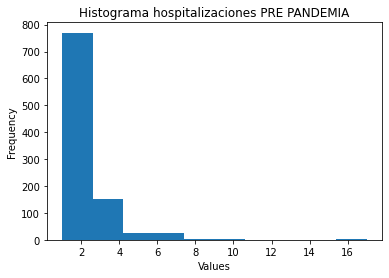

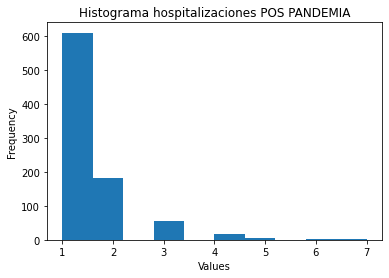

In [98]:
#Histograma cantidad de hospitalizaciones PREPANDEMIA
n, bins, patches=plt.hist(base_completa_pre['Hospitalizaciones'])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histograma hospitalizaciones PRE PANDEMIA")
plt.show()

#Histograma cantidad de hospitalizaciones POSPANDEMIA
n, bins, patches=plt.hist(base_completa_pos['Hospitalizaciones'])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histograma hospitalizaciones POS PANDEMIA")
plt.show()

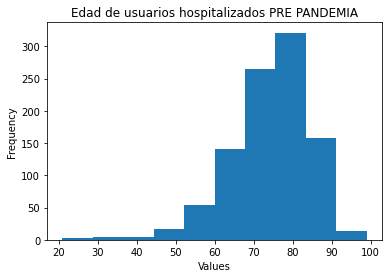

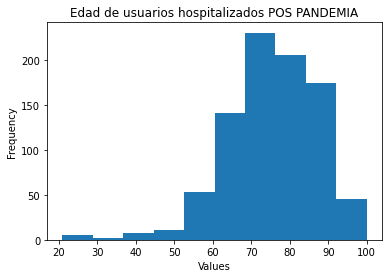

In [99]:
#Histograma de la edad pre y pospandemia
n, bins, patches=plt.hist(base_completa_pre['Edad'])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Edad de usuarios hospitalizados PRE PANDEMIA")
plt.show()

n, bins, patches=plt.hist(base_completa_pos['Edad'])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Edad de usuarios hospitalizados POS PANDEMIA")
plt.show()

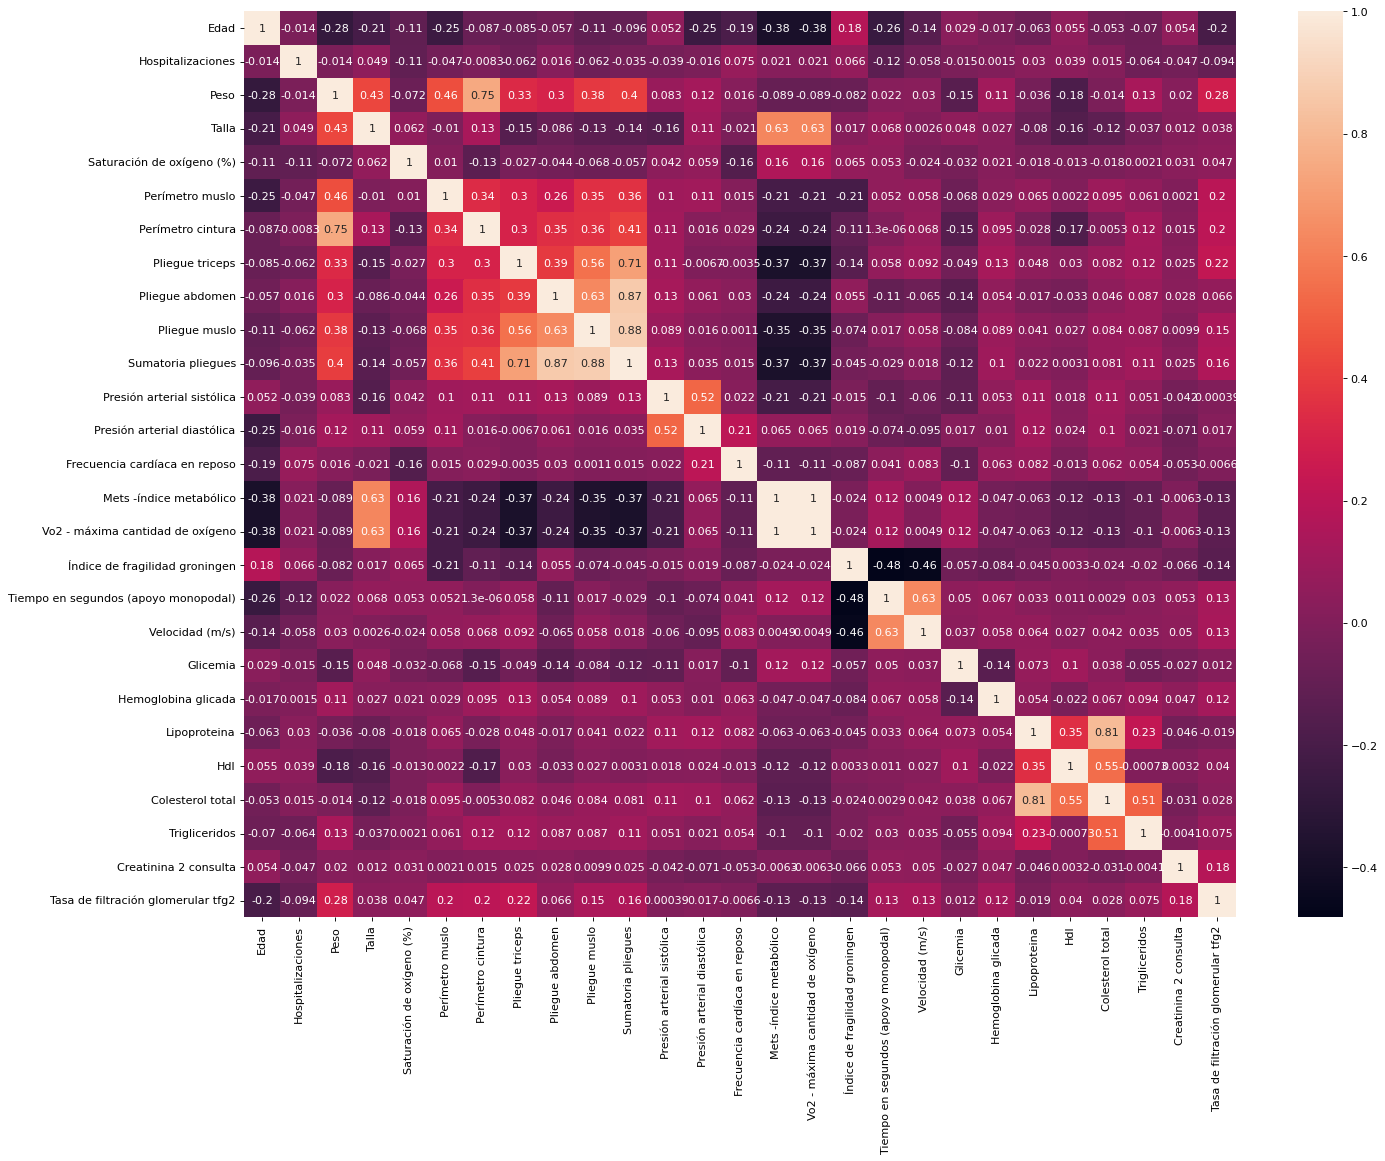

In [100]:
#Correlaciones
df_num_pre = base_completa_pre[['Edad', 'Hospitalizaciones', 'Peso', 'Talla','Saturación de oxígeno (%)','Perímetro muslo', 'Perímetro cintura','Pliegue triceps', 'Pliegue abdomen','Pliegue muslo','Sumatoria pliegues','Presión arterial sistólica','Presión arterial diastólica','Frecuencia cardíaca en reposo','Mets -índice metabólico','Vo2 - máxima cantidad de oxígeno','Índice de fragilidad groningen','Tiempo en segundos (apoyo monopodal)','Velocidad (m/s)','Glicemia','Hemoglobina glicada','Lipoproteina','Hdl','Colesterol total','Trigliceridos','Creatinina 2 consulta','Tasa de filtración glomerular tfg2']]
figure(figsize=(20, 15), dpi=80);
sns.heatmap(df_num_pre.corr(), annot = True);

In [101]:
print(base_completa_pre.shape)
print(base_completa_pos.shape)

(981, 61)
(873, 69)


# **Prepandemia**

##**Bodega de datos**

In [102]:
base_completa_pre =  base_completa_pre.drop(['Fecha ingreso clinica', 'Fecha salida'], axis = 1)

In [103]:
df_num_pre = base_completa_pre[['Nrodoc','Edad', 'Hospitalizaciones', 'Peso', 'Talla','Saturación de oxígeno (%)','Perímetro muslo', 'Perímetro cintura','Pliegue triceps', 'Pliegue abdomen','Pliegue muslo','Sumatoria pliegues','Presión arterial sistólica','Presión arterial diastólica','Frecuencia cardíaca en reposo','Mets -índice metabólico','Vo2 - máxima cantidad de oxígeno','Índice de fragilidad groningen','Tiempo en segundos (apoyo monopodal)','Velocidad (m/s)','Glicemia','Hemoglobina glicada','Lipoproteina','Hdl','Colesterol total','Trigliceridos','Creatinina 2 consulta','Tasa de filtración glomerular tfg2']]

In [104]:
df_cat_nom_pre = base_completa_pre[[ 'Tipo egreso','Transfusion sangre','Antibiotico','Dxprincipal egreso', 'Profesional especialidad grd','Sexo','Clasificación imc','Diabetes mellitus','Control diabetes','Tiene hta','Tiene epoc','Enfermedad coronaria (en el último año)', 'Insuficiencia cardíaca','Valvulopatía','Arritmia o paciente con dispositivo','Sufre de alguna enfermedad cardiovascular','Tabaquismo','Estadio de la enfermedad renal','Clase funcional','Úlcera de pie diabético','Diagnóstico principal','Ambito según el médico']]

In [105]:
df_cat_ord =  base_completa_pre[['Year', 'Mes', 'Ciclo_vital', 'Clasificación imc', 'Calificación (apoyo monopodal)','Calificación velocidad','Calificación (índice de fragilidad)', 'Test findrisc','Epoc (clasificación bodex)','Auto-calificacion nivel de ejercicio']]

In [106]:
df_cat_ord['Year'] =df_cat_ord ['Year'].replace('2017', 1 )
df_cat_ord['Year'] =df_cat_ord ['Year'].replace('2018', 2 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('ENERO', 1 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('FEBRERO', 2 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('MARZO', 3 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('ABRIL', 4 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('MAYO', 5 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('JUNIO', 6 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('JULIO', 7 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('AGOSTO', 8 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('SEPTIEMBRE', 9 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('OCTUBRE', 10 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('NOVIEMBRE', 11 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('DICIEMBRE', 12 )
df_cat_ord['Ciclo_vital'] =df_cat_ord ['Ciclo_vital'].replace('Juventud', 1)
df_cat_ord['Ciclo_vital'] =df_cat_ord ['Ciclo_vital'].replace('Adultez', 2 )
df_cat_ord['Ciclo_vital'] =df_cat_ord ['Ciclo_vital'].replace('Vejez', 3 )
df_cat_ord['Clasificación imc'] =df_cat_ord ['Clasificación imc'].replace('Bajo', 1 )
df_cat_ord['Clasificación imc'] =df_cat_ord ['Clasificación imc'].replace('Normal', 2 )
df_cat_ord['Clasificación imc'] =df_cat_ord ['Clasificación imc'].replace('Sobrepeso', 3 )
df_cat_ord['Clasificación imc'] =df_cat_ord ['Clasificación imc'].replace('Obesidad Grasa', 4 )
df_cat_ord['Calificación (apoyo monopodal)'] =df_cat_ord ['Calificación (apoyo monopodal)'].replace('Malo - Fragil', 1 )
df_cat_ord['Calificación (apoyo monopodal)'] =df_cat_ord ['Calificación (apoyo monopodal)'].replace('Aceptable', 2 )
df_cat_ord['Calificación (apoyo monopodal)'] =df_cat_ord ['Calificación (apoyo monopodal)'].replace('Bueno', 3)
df_cat_ord['Calificación velocidad'] =df_cat_ord ['Calificación velocidad'].replace('Deficiente', 1)
df_cat_ord['Calificación velocidad'] =df_cat_ord ['Calificación velocidad'].replace('Malo - Frágil', 2)
df_cat_ord['Calificación velocidad'] =df_cat_ord ['Calificación velocidad'].replace('Aceptable', 3)
df_cat_ord['Calificación velocidad'] =df_cat_ord ['Calificación velocidad'].replace('Bueno', 4)
df_cat_ord['Calificación (índice de fragilidad)'] =df_cat_ord ['Calificación (índice de fragilidad)'].replace('Frágil', 1)
df_cat_ord['Calificación (índice de fragilidad)'] =df_cat_ord ['Calificación (índice de fragilidad)'].replace('Normal', 2)
df_cat_ord['Test findrisc'] =df_cat_ord ['Test findrisc'].replace('Baja Probabilidad de Diabetes', 1)
df_cat_ord['Test findrisc'] =df_cat_ord ['Test findrisc'].replace('Alta Probabilidad de Diabetes', 2)
df_cat_ord['Epoc (clasificación bodex)'] =df_cat_ord ['Epoc (clasificación bodex)'].replace('No aplica', 0)
df_cat_ord['Epoc (clasificación bodex)'] =df_cat_ord ['Epoc (clasificación bodex)'].replace('Leve', 1)
df_cat_ord['Epoc (clasificación bodex)'] =df_cat_ord ['Epoc (clasificación bodex)'].replace('Moderada', 2)
df_cat_ord['Epoc (clasificación bodex)'] =df_cat_ord ['Epoc (clasificación bodex)'].replace('Grave', 3)
df_cat_ord['Auto-calificacion nivel de ejercicio'] =df_cat_ord ['Epoc (clasificación bodex)'].replace('Grave', 3)

'Auto-calificacion nivel de ejercicio'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

'Auto-calificacion nivel de ejercicio'

In [107]:
df_cat_ord['Calificación velocidad'].unique()

array([3, 1, 4, 2])

In [108]:
df_dummies_pre=pd.get_dummies(df_cat_nom_pre)
#df_dummies_pre['Tipo egreso_Sin información']
df_dummies_pre = df_dummies_pre.drop('Tipo egreso_Sin información', axis=1)

In [109]:
print(df_num_pre.shape)
print(df_dummies_pre.shape)

(981, 28)
(981, 460)


In [110]:
df_num_pre = df_num_pre.loc[:,~df_num_pre.columns.isin(['Hospitalizaciones','Nrodoc'])] #fuatures, sin variable target y el ID de empleados

In [111]:
df_num_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 980
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Edad                                  981 non-null    int64  
 1   Peso                                  981 non-null    float64
 2   Talla                                 981 non-null    float64
 3   Saturación de oxígeno (%)             981 non-null    int64  
 4   Perímetro muslo                       981 non-null    float64
 5   Perímetro cintura                     981 non-null    float64
 6   Pliegue triceps                       981 non-null    float64
 7   Pliegue abdomen                       981 non-null    float64
 8   Pliegue muslo                         981 non-null    float64
 9   Sumatoria pliegues                    981 non-null    float64
 10  Presión arterial sistólica            981 non-null    int64  
 11  Presión arterial di

In [112]:
#Aplicar método de Reescalado a las variables numéricas
arreglo = df_num_pre.values     

scalador = MinMaxScaler(feature_range=(0,1))
dReescalados = scalador.fit_transform(arreglo)
np.set_printoptions(precision=2, suppress=True)
print(dReescalados)

[[0.45 0.39 0.58 ... 0.14 0.02 0.45]
 [0.78 0.29 0.34 ... 0.17 0.02 0.27]
 [0.67 0.72 0.69 ... 0.09 0.   0.  ]
 ...
 [0.49 0.49 0.85 ... 0.12 0.   0.  ]
 [0.65 0.41 0.65 ... 0.09 0.02 0.38]
 [0.49 0.43 0.66 ... 0.26 0.   0.  ]]


In [113]:
list1 = dReescalados.tolist() 
df_R = pd.DataFrame(list1) #convertir a DataFrame
lista = df_num_pre.columns
for i in range(len(lista)):
    df_R = df_R.rename(columns= {i : lista[i]}) 
df_R


,Edad,Peso,Talla,Saturación de oxígeno (%),Perímetro muslo,Perímetro cintura,Pliegue triceps,Pliegue abdomen,Pliegue muslo,Sumatoria pliegues,...,Tiempo en segundos (apoyo monopodal),Velocidad (m/s),Glicemia,Hemoglobina glicada,Lipoproteina,Hdl,Colesterol total,Trigliceridos,Creatinina 2 consulta,Tasa de filtración glomerular tfg2
0,0.448718,0.389474,0.580645,0.750,0.378788,0.633333,0.083333,0.294737,0.1500,0.251397,...,0.012195,0.200,0.000000,0.000000,0.581028,0.330986,0.505995,0.135967,0.018868,0.448194
1,0.782051,0.294737,0.338710,0.975,0.340909,0.680000,0.250000,0.052632,0.1250,0.167598,...,0.000000,0.200,0.567610,0.000000,0.383399,0.288732,0.378897,0.172573,0.018868,0.269099
2,0.666667,0.715789,0.693548,0.900,0.492424,0.826667,0.200000,0.631579,0.1875,0.486034,...,0.024390,0.166,0.386049,0.055670,0.215020,0.334155,0.267890,0.085938,0.000000,0.000000
3,0.705128,0.231579,0.451613,0.800,0.348485,0.573333,0.166667,0.105263,0.0625,0.139665,...,0.121951,0.334,0.000000,0.000000,0.513834,0.535211,0.529976,0.125508,0.000000,0.000000
4,0.769231,0.768421,0.758065,0.675,0.439394,0.880000,0.250000,0.473684,0.5625,0.586592,...,0.243902,0.200,0.000000,0.083814,0.296443,0.584507,0.424460,0.162114,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,0.589744,0.452632,0.258065,0.950,0.454545,0.666667,0.166667,0.421053,0.5000,0.502793,...,0.000000,0.000,0.000000,0.000000,0.357115,0.353592,0.406811,0.253438,0.000000,0.000000
977,0.730769,0.378947,0.596774,0.825,0.348485,0.633333,0.166667,0.157895,0.3125,0.279330,...,0.304878,0.200,0.453659,0.060825,0.213439,0.415493,0.306954,0.134224,0.000000,0.000000
978,0.487179,0.494737,0.854839,0.950,0.416667,0.660000,0.333333,0.252632,0.2125,0.340782,...,0.060976,0.126,0.000000,0.067010,0.335968,0.239437,0.318945,0.122021,0.000000,0.000000
979,0.653846,0.410526,0.645161,0.900,0.401515,0.646667,0.133333,0.473684,0.1500,0.363128,...,0.243902,0.200,0.000000,0.073299,0.233202,0.253521,0.256595,0.094131,0.018868,0.377341


In [114]:
cat = pd.concat([df_cat_ord ,df_dummies_pre],axis=1)

In [115]:
X =pd.concat([df_R, cat],axis=1)

In [116]:
X.shape

(981, 496)

In [117]:
df_dummies_pre.shape


(981, 460)

In [118]:
df_R.shape

(981, 26)

In [119]:
y = base_completa_pre.Hospitalizaciones #variable Target 

## **Selección de variables y contrucción de algoritmos**

In [120]:
m_lreg = linear_model.LinearRegression()
m_rtree=tree.DecisionTreeRegressor()
m_rf= RandomForestRegressor()
m_gbt=GradientBoostingRegressor()

modelos=list([m_lreg,m_rtree, m_rf, m_gbt])


In [121]:
#Selección de variables por kBest, se muestran las 20 más relevantes
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
kBest = SelectKBest(score_func = f_classif, k = 20)
fit = kBest.fit(X,y)
var_names = fit.get_feature_names_out()
var_names

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

divide by zero encountered in true_divide



array(['Year', 'Antibiotico_NO', 'Antibiotico_SI',
       'Dxprincipal egreso_EMBOLIA PULMONAR CON MENCION DE CORAZON PULMONAR AGUDO',
       'Dxprincipal egreso_ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIENCIA CARDIACA (CONGESTIVA) ',
       'Dxprincipal egreso_ENFERMEDAD CARDIORRENAL HIPERTENSIVA CON INSUFICIENCIA CARDIACA (CONGESTIVA) ',
       'Dxprincipal egreso_ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EXACERBACION AGUDA  NO ESPECIFICADA',
       'Dxprincipal egreso_ENFERMEDAD TOXICA DEL HIGADO CON CIRROSIS Y FIBROSIS DEL HIGADO',
       'Dxprincipal egreso_LINFOMA DE CELULAS GRANDES B DIFUSO',
       'Dxprincipal egreso_TUBERCULOSIS DEL PULMON  CONFIRMADA POR HALLAZGO MICROSCOPICO DEL BACILO TUBERCULOSO EN ESPUTO CON O SIN CULTIVO',
       'Profesional especialidad grd_Cx trasplantes/hepatobiliopancreatrica',
       'Profesional especialidad grd_Hematología',
       'Profesional especialidad grd_Infectologia',
       'Control diabetes_Falta hemoglobina', 'Tiene epoc_Si',
   

In [122]:
X2=X[var_names]

In [123]:
modelo = m_rf
modelo.fit(X,y)
print(modelo.feature_importances_)

[0.01 0.03 0.02 0.02 0.01 0.02 0.01 0.02 0.02 0.02 0.02 0.03 0.02 0.02
 0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.04 0.01 0.02 0.01 0.01 0.04 0.05
 0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.01 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.08
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.02 0.   0.   0.

In [124]:
#Selección de variables por kBest, se muestran las 25 más relevantes
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
kBest = SelectKBest(score_func = f_classif, k = 40)
fit = kBest.fit(X,y)
var_names = fit.get_feature_names_out()
var_names

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

divide by zero encountered in true_divide



array(['Peso', 'Saturación de oxígeno (%)',
       'Índice de fragilidad groningen', 'Hdl', 'Year', 'Mes',
       'Calificación (índice de fragilidad)', 'Tipo egreso_Alta Médica',
       'Tipo egreso_Fallece', 'Antibiotico_NO', 'Antibiotico_SI',
       'Dxprincipal egreso_ANGIODISPLASIA DEL COLON',
       'Dxprincipal egreso_COMPLICACION MECANICA DE CATETER PARA DIALISIS VASCULAR',
       'Dxprincipal egreso_EMBOLIA PULMONAR CON MENCION DE CORAZON PULMONAR AGUDO',
       'Dxprincipal egreso_ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIENCIA CARDIACA (CONGESTIVA) ',
       'Dxprincipal egreso_ENFERMEDAD CARDIORRENAL HIPERTENSIVA CON INSUFICIENCIA CARDIACA (CONGESTIVA) ',
       'Dxprincipal egreso_ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EXACERBACION AGUDA  NO ESPECIFICADA',
       'Dxprincipal egreso_ENFERMEDAD TOXICA DEL HIGADO CON CIRROSIS Y FIBROSIS DEL HIGADO',
       'Dxprincipal egreso_ESTADO ASMATICO',
       'Dxprincipal egreso_LINFOMA DE CELULAS GRANDES B DIFUSO',
       'D

In [125]:
X3=X[var_names]

In [126]:
def sel_variables(modelos,X,y, SelectFromModel,np,threshold):
    
    var_names_ac=np.array([])
    for modelo in modelos:
        #modelo=modelos[i]
        modelo.fit(X,y)
        sel = SelectFromModel(modelo, prefit=True,threshold=threshold)
        var_names= sel.get_feature_names_out(modelo.feature_names_in_)
        var_names_ac=np.append(var_names_ac, var_names)
        var_names_ac=np.unique(var_names_ac)
    
    return var_names_ac

In [127]:
var_names=sel_variables(modelos,X,y,SelectFromModel,np,threshold="mean")
var_names.shape

(113,)

In [128]:
X4= X[var_names]

In [129]:
def medir_modelos(modelos,scoring,X,y,cv,cross_val_score,pd):

    metric_modelos=pd.DataFrame()
    for modelo in modelos:
        scores=cross_val_score(modelo,X,y, scoring=scoring, cv=cv )
        pdscores=pd.DataFrame(scores)
        metric_modelos=pd.concat([metric_modelos,pdscores],axis=1)
    
    metric_modelos.columns=["reg_lineal","decision_tree","random_forest","gradient_boosting"]
    return metric_modelos

In [130]:
#construcción de dataFrame con medidadas de desempeño de difererentes modelos, para cada uno de los grupos de variables
score_1 = medir_modelos( modelos, "neg_mean_absolute_percentage_error",X,y, kfold, cross_val_score,pd)
score_2 = medir_modelos( modelos, "neg_mean_absolute_percentage_error",X2,y, kfold, cross_val_score,pd)
score_3 = medir_modelos( modelos, "neg_mean_absolute_percentage_error",X3,y, kfold, cross_val_score,pd)
score_4 = medir_modelos( modelos, "neg_mean_absolute_percentage_error",X4,y, kfold, cross_val_score,pd)

In [131]:
score_1['Type'] = 'All' #desempeño con todas las variables
score_2['Type'] = '20_v' #desempeño de 25 variables
score_3['Type'] = '40_v' # desempeño de 151 variables
score_4['Type'] = '126_v' # desempeño de 52 variables

In [132]:
scoreF = pd.concat([score_1, score_2, score_3, score_4 ], axis = 0) #union de todos los desempeños por modelos

In [133]:
#BoxPlots de todos los modelos por grupo de variables
fig = go.Figure()
for column in scoreF.columns[:-1]:
    fig.add_trace(go.Box(
        y = scoreF[column],
        x = scoreF.iloc[:,-1],
        name = column
    ))
fig.update_layout(
    yaxis_title = 'score',
    boxmode = 'group',
    colorway = px.colors.sequential.ice
)

fig.show()

In [134]:
mape_df=medir_modelos(modelos,"neg_mean_absolute_percentage_error",X,y,10, cross_val_score, pd)
rmse_df= medir_modelos(modelos,"neg_root_mean_squared_error",X,y,10, cross_val_score, pd)

In [135]:
mape_varsel=medir_modelos(modelos,"neg_mean_absolute_percentage_error",X2,y,10, cross_val_score, pd)
rmse_varsel=medir_modelos(modelos,"neg_root_mean_squared_error",X2,y,10, cross_val_score, pd)

Index(['reg_lineal', 'decision_tree', 'random_forest', 'gradient_boosting'], dtype='object')

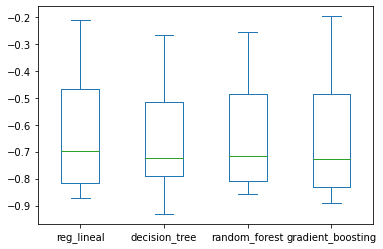

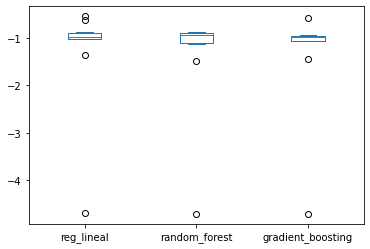

In [136]:
mape=pd.concat([mape_df,mape_varsel],axis=1)
mape.columns=['rl', 'dt', 'rf', 'gb',
       'rl_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']

rmse=pd.concat([rmse_df,rmse_varsel],axis=1)
rmse.columns=['rl', 'dt', 'rf', 'gb',
       'rl_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']

mape_varsel.plot(kind='box')
rmse_varsel[["reg_lineal", "random_forest","gradient_boosting"]].plot(kind='box')
rmse_varsel.columns

Index(['reg_lineal', 'decision_tree', 'random_forest', 'gradient_boosting'], dtype='object')

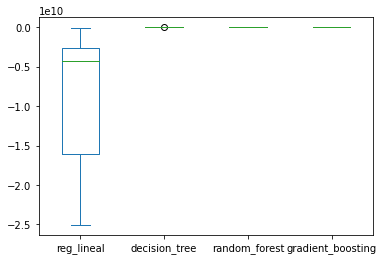

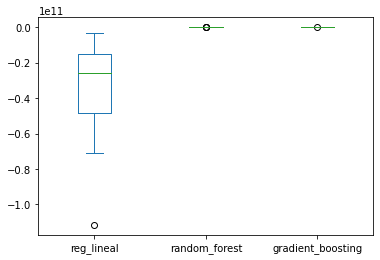

In [137]:
mape_df.plot(kind='box')
rmse_df[["reg_lineal","random_forest","gradient_boosting"]].plot(kind='box')
rmse_varsel.columns

## **Afinamiento de hiperparámetros**

Se realiza el ajuste de hiperparámetros para dos modelos, los cuales son: Random Forest Y Decision Tree, debido a que presentan un buen desempeño en la selección de modelos mostrada anteriormente. Cabe mencionar, que a pesar de que el costo computacional es mayor, respecto a hacer ajuste de hiperparámetros, se decide hacerlo de esta forma para seleccionar el que mejor comportamiento tenga. 

In [138]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

Random Forest

In [139]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X2, y, test_size=test_size,random_state=seed) #partir datos en entrenamiento y prueba
regr = m_rf #creación del modelo
regr.fit(X_train, Y_train) # entrenamiento del mdoelo 
predicted = regr.predict(X_test)

In [140]:
# Grid de hiperparámetros evaluados para Random Forest 
# ------------------------------------------------------------------------------
param_grid = {'n_estimators': [3, 100, 150, 500],
              'max_features': [5,7 ,9, 20],
              'max_depth'   : [None, 3, 10 ,20]
             }

# Búsqueda por grid search con validación cruzada
# ------------------------------------------------------------------------------
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = Y_train)

# Resultados
# ------------------------------------------------------------------------------
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
18,3,5,150,-1.742512,0.282201,-1.536463,0.048213
17,3,5,100,-1.742968,0.282594,-1.537674,0.049156
19,3,5,500,-1.743009,0.281979,-1.534172,0.049438
23,3,7,500,-1.744687,0.280784,-1.518576,0.049198


In [141]:
# Mejores hiperparámetros por validación cruzada para Random Forest 
# --------------------------------------------------------------------
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 3, 'max_features': 5, 'n_estimators': 150} : -1.742511900179653 neg_root_mean_squared_error


In [142]:
modelo_finalRF = grid.best_estimator_

Decision Tree

In [143]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X2, y, test_size=test_size,random_state=seed) #partir datos en entrenamiento y prueba
regr = m_rtree #creación del modelo
regr.fit(X_train, Y_train) # entrenamiento del mdoelo 
predicted = regr.predict(X_test)

In [144]:
# Grid de hiperparámetros evaluados
#--------------------------------------------------------------------
param_grid = {'min_samples_split' : [2,3,4,5],
              'min_samples_leaf' : [1,2,3],
              'max_depth'   : [None, 3, 10, 20]
              
             }

# Búsqueda por grid search con validación cruzada
# ------------------------------------------------------------------------------
grid = GridSearchCV(
        estimator  = tree.DecisionTreeRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = Y_train)

# Resultados
# ------------------------------------------------------------------------------
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score,mean_train_score,std_train_score
15,3,1,5,-1.740879,0.29151,-1.544164,0.050692
14,3,1,4,-1.740879,0.29151,-1.544164,0.050692
13,3,1,3,-1.740879,0.29151,-1.544164,0.050692
12,3,1,2,-1.740879,0.29151,-1.544164,0.050692


In [145]:
# Mejores hiperparámetros por validación cruzada
# --------------------------------------------------------------------
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} : -1.7408785343414779 neg_root_mean_squared_error


In [146]:
modelo_finalDT = grid.best_estimator_

 
## **Evaluar modelos afinados**

In [147]:
#####Evaluar métrica de entrenamiento y evaluación para mirar sobre ajuste ####

eval=cross_validate(modelo_finalRF,X2,y,cv=5,scoring="neg_root_mean_squared_error",return_train_score=True)
eval2=cross_validate(modelo_finalDT,X2,y,cv=5,scoring="neg_root_mean_squared_error",return_train_score=True)

In [148]:
train_rf=pd.DataFrame(eval['train_score'])
test_rf=pd.DataFrame(eval['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']

train_dt=pd.DataFrame(eval2['train_score'])
test_dt=pd.DataFrame(eval2['test_score'])
train_test_dt=pd.concat([train_dt, test_dt],axis=1)
train_test_dt.columns=['train_score','test_score']

In [149]:
train_test_rf

,train_score,test_score
0,-0.485373,-3.733954
1,-1.612641,-0.391459
2,-1.569619,-0.967866
3,-1.552626,-1.087784
4,-1.559954,-1.045903


In [150]:
train_test_dt

,train_score,test_score
0,-0.483515,-3.732737
1,-1.617256,-0.433577
2,-1.565573,-0.995274
3,-1.550842,-1.115152
4,-1.557809,-1.060545


In [151]:
train_test_rf["test_score"].mean()

-1.445393154416505

In [152]:
train_test_dt["test_score"].mean()

-1.467457005774306

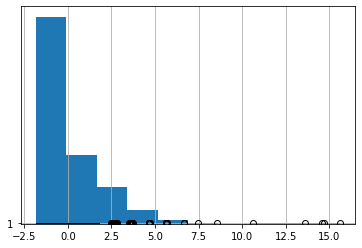

In [153]:
predictions=cross_val_predict(modelo_finalRF,X2,y,cv=5)

pred=pd.DataFrame(predictions,columns=['pred'])
pdy=y.to_frame()
error=pdy['Hospitalizaciones']-pred['pred']
error.hist()

plt.boxplot(error,vert=False)
plt.show()

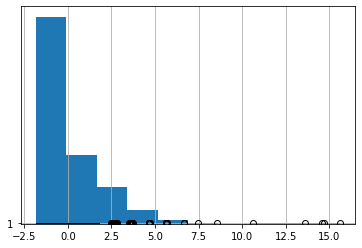

In [154]:

predictions2=cross_val_predict(modelo_finalDT,X2,y,cv=5)

pred2=pd.DataFrame(predictions2,columns=['pred'])
error2=pdy['Hospitalizaciones']-pred['pred']
error2.hist()


plt.boxplot(error2,vert=False)
plt.show()

A pesar de que los dos modelos tienen un comportamiento muy similar 

**Importancia de variables**

In [155]:
importancia = permutation_importance(
                estimator    = modelo_finalRF,
                X            = X_train,
                y            = Y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
7,0.061785,0.004750,Dxprincipal egreso_ENFERMEDAD TOXICA DEL HIGAD...
17,0.050082,0.002022,Diagnóstico principal_J450 - ASMA PREDOMINANTE...
9,0.035434,0.001488,Dxprincipal egreso_TUBERCULOSIS DEL PULMON CO...
0,0.033042,0.009602,Year
15,0.016848,0.002187,Clase funcional_Clase funcional 3
14,0.014960,0.003911,Tiene epoc_Si
6,0.014858,0.004338,Dxprincipal egreso_ENFERMEDAD PULMONAR OBSTRUC...
5,0.014796,0.007658,Dxprincipal egreso_ENFERMEDAD CARDIORRENAL HIP...
8,0.013055,0.001281,Dxprincipal egreso_LINFOMA DE CELULAS GRANDES ...
13,0.012759,0.001500,Control diabetes_Falta hemoglobina


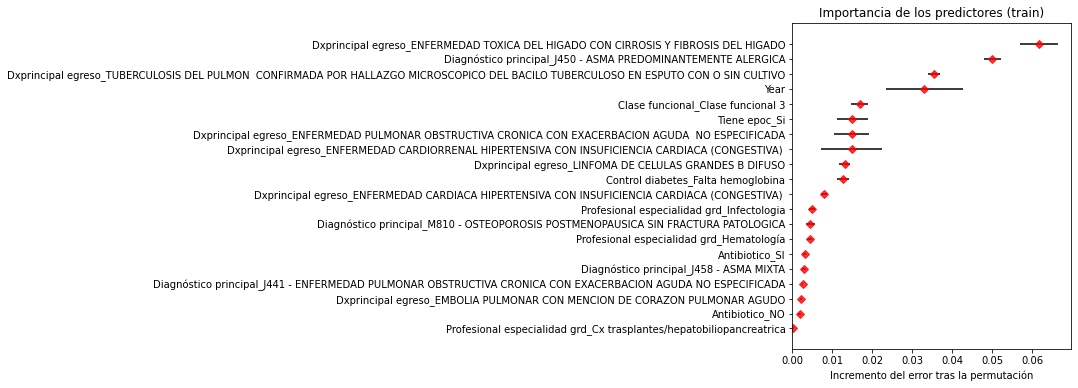

In [156]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

##**Despliegue**

In [157]:
modelo_finalRF

RandomForestRegressor(max_depth=3, max_features=5, n_estimators=150,
                      random_state=123)

In [158]:
x_pre = X2
model_final_RF_PRE = modelo_finalRF

In [159]:
joblib.dump(model_final_RF_PRE, "model_final.pkl")

['model_final.pkl']

In [160]:
##Cargar modelo y predecir
model_final = joblib.load("model_final.pkl")
predicciones=model_final.predict(x_pre)

In [161]:
pd_pred=pd.DataFrame(predicciones[:873])
df_ID = base_completa_pos[['Nrodoc']]
hosp_pred=pd.concat([df_ID, pd_pred],axis=1)
hosp_pred.rename(columns = {0 : 'Hospitalizaciones'}, inplace = True)
hosp_pred

,Nrodoc,Hospitalizaciones
0,312214,10.327482
1,311890,6.543789
2,306827,3.266254
3,307942,3.493462
4,308140,2.396407
...,...,...
868,313704,1.651140
869,313418,1.947105
870,312815,1.982116
871,311775,1.947105


In [162]:
canpre = hosp_pred.query('Hospitalizaciones >4')

In [163]:
canpre

,Nrodoc,Hospitalizaciones
0,312214,10.327482
1,311890,6.543789
5,308221,4.968647


In [164]:
canpre['Hospitalizaciones'].mean()

7.279972341875922

In [168]:
hosp_pred.to_excel("/content/drive/Shareddrives/Analítica/NIVEL 3/Salud/hospitalizaciones_pre.xlsx") # guardamos el archivo como hospitalizaciones_pre.xlsx
files.download('/content/drive/Shareddrives/Analítica/NIVEL 3/Salud/hospitalizaciones_pre.xlsx') # descargamos el archivo en nuestra maquina local

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Pospandemia**

##**Bodega de datos**


In [169]:
df_num_pos = base_completa_pos[['Edad', 'Nrodoc','Hospitalizaciones', 'Peso', 'Talla', 'Imc','Saturación de oxígeno (%)','Perímetro muslo', 'Perímetro cintura','Pliegue triceps', 'Pliegue abdomen','Pliegue muslo','Sumatoria pliegues','Presión arterial sistólica','Presión arterial diastólica','Frecuencia cardíaca en reposo','Mets -índice metabólico','Vo2 - máxima cantidad de oxígeno','Índice de fragilidad groningen','Tiempo en segundos (apoyo monopodal)','Velocidad (m/s)','Glicemia','Hemoglobina glicada','Cuantos cigarrillos día','Años de consumo','Lipoproteina','Hdl','Colesterol total','Trigliceridos','Creatinina 2 consulta','Tasa de filtración glomerular tfg2']]

In [170]:
df_cat_nom_pos = base_completa_pos[[ 'Tipo egreso','Transfusion sangre','Antibiotico','Dxprincipal egreso', 'Profesional especialidad grd','Sexo','Municipio','Índice tobillo/brazo','Diabetes mellitus','Control diabetes','Tiene hta','Control hta','Tiene riesgo de tener hta','Tiene epoc','Enfermedad coronaria (en el último año)', 'Insuficiencia cardíaca','Valvulopatía','Arritmia o paciente con dispositivo','Sufre de alguna enfermedad cardiovascular','Tabaquismo','Estadio de la enfermedad renal','Clase funcional','Úlcera de pie diabético','Diagnóstico principal','Tiene próximo control','Requiere cita de morbilidad','Ambito según el médico']]

In [171]:
df_cat_ord =  base_completa_pos[['Year', 'Mes', 'Ciclo_vital', 'Clasificación imc', 'Calificación (apoyo monopodal)','Calificación velocidad','Calificación (índice de fragilidad)', 'Auto-calificacion nivel de ejercicio', 'Clasificación de framinghan']]

In [172]:
df_cat_ord['Year'] =df_cat_ord ['Year'].replace('2017', 1 )
df_cat_ord['Year'] =df_cat_ord ['Year'].replace('2018', 2 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('ENERO', 1 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('FEBRERO', 2 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('MARZO', 3 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('ABRIL', 4 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('MAYO', 5 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('JUNIO', 6 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('JULIO', 7 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('AGOSTO', 8 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('SEPTIEMBRE', 9 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('OCTUBRE', 10 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('NOVIEMBRE', 11 )
df_cat_ord['Mes'] =df_cat_ord ['Mes'].replace('DICIEMBRE', 12 )
df_cat_ord['Ciclo_vital'] =df_cat_ord ['Ciclo_vital'].replace('Juventud', 1)
df_cat_ord['Ciclo_vital'] =df_cat_ord ['Ciclo_vital'].replace('Adultez', 2 )
df_cat_ord['Ciclo_vital'] =df_cat_ord ['Ciclo_vital'].replace('Vejez', 3 )
df_cat_ord['Clasificación imc'] =df_cat_ord ['Clasificación imc'].replace('Bajo', 1 )
df_cat_ord['Clasificación imc'] =df_cat_ord ['Clasificación imc'].replace('Normal', 2 )
df_cat_ord['Clasificación imc'] =df_cat_ord ['Clasificación imc'].replace('Sobrepeso', 3 )
df_cat_ord['Clasificación imc'] =df_cat_ord ['Clasificación imc'].replace('Obesidad Grasa', 4 )
df_cat_ord['Calificación (apoyo monopodal)'] =df_cat_ord ['Calificación (apoyo monopodal)'].replace('Malo - Fragil', 1 )
df_cat_ord['Calificación (apoyo monopodal)'] =df_cat_ord ['Calificación (apoyo monopodal)'].replace('Aceptable', 2 )
df_cat_ord['Calificación (apoyo monopodal)'] =df_cat_ord ['Calificación (apoyo monopodal)'].replace('Bueno', 3)
df_cat_ord['Calificación velocidad'] =df_cat_ord ['Calificación velocidad'].replace('Deficiente', 1)
df_cat_ord['Calificación velocidad'] =df_cat_ord ['Calificación velocidad'].replace('Malo - Frágil', 2)
df_cat_ord['Calificación velocidad'] =df_cat_ord ['Calificación velocidad'].replace('Aceptable', 3)
df_cat_ord['Calificación velocidad'] =df_cat_ord ['Calificación velocidad'].replace('Bueno', 4)
df_cat_ord['Calificación (índice de fragilidad)'] =df_cat_ord ['Calificación (índice de fragilidad)'].replace('Frágil', 1)
df_cat_ord['Calificación (índice de fragilidad)'] =df_cat_ord ['Calificación (índice de fragilidad)'].replace('Normal', 2)
df_cat_ord['Clasificación de framinghan'] = df_cat_ord['Clasificación de framinghan'].replace('Bajo riesgo', 1)
df_cat_ord['Clasificación de framinghan'] = df_cat_ord['Clasificación de framinghan'].replace('Alto riesgo', 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [173]:
df_dummies_pos=pd.get_dummies(df_cat_nom_pos)
#df_dummies_pre['Tipo egreso_Sin información']
#df_dummies_pos = df_dummies_pos.drop('Tipo egreso_Sin información', axis=1)

In [174]:
print(df_num_pos.shape)
print(df_dummies_pos.shape)

(873, 31)
(873, 510)


In [175]:
df_num_pos = df_num_pos.loc[:,~df_num_pos.columns.isin(['Hospitalizaciones','Nrodoc'])] #fuatures, sin variable target y el ID de empleados

In [176]:
df_num_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 872
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Edad                                  873 non-null    int64  
 1   Peso                                  873 non-null    float64
 2   Talla                                 873 non-null    float64
 3   Imc                                   873 non-null    float64
 4   Saturación de oxígeno (%)             873 non-null    int64  
 5   Perímetro muslo                       873 non-null    float64
 6   Perímetro cintura                     873 non-null    float64
 7   Pliegue triceps                       873 non-null    float64
 8   Pliegue abdomen                       873 non-null    float64
 9   Pliegue muslo                         873 non-null    float64
 10  Sumatoria pliegues                    873 non-null    float64
 11  Presión arterial si

In [177]:
#Aplicar método de Reescalado a las variables numéricas
arreglo = df_num_pos.values     

scalador = MinMaxScaler(feature_range=(0,1))
dReescalados = scalador.fit_transform(arreglo)
np.set_printoptions(precision=2, suppress=True)
print(dReescalados)

[[0.09 0.11 0.45 ... 0.14 0.04 0.51]
 [0.76 0.2  0.36 ... 0.1  0.09 0.13]
 [0.49 0.46 0.82 ... 0.27 0.05 0.66]
 ...
 [0.65 0.3  0.38 ... 0.14 0.   0.  ]
 [0.56 0.19 0.34 ... 0.14 0.06 0.26]
 [0.47 0.47 0.54 ... 0.13 0.   0.  ]]


In [178]:
list1 = dReescalados.tolist() 
df_R = pd.DataFrame(list1) #convertir a DataFrame
lista = df_num_pos.columns
for i in range(len(lista)):
    df_R = df_R.rename(columns= {i : lista[i]}) 
df_R

,Edad,Peso,Talla,Imc,Saturación de oxígeno (%),Perímetro muslo,Perímetro cintura,Pliegue triceps,Pliegue abdomen,Pliegue muslo,...,Glicemia,Hemoglobina glicada,Cuantos cigarrillos día,Años de consumo,Lipoproteina,Hdl,Colesterol total,Trigliceridos,Creatinina 2 consulta,Tasa de filtración glomerular tfg2
0,0.088608,0.110169,0.446429,0.096066,0.769231,0.043478,0.635659,0.340426,0.246753,0.211268,...,0.108053,0.000000,0.000000,0.000000,0.000000,0.402477,0.342359,0.138086,0.035341,0.508581
1,0.759494,0.203390,0.357143,0.233074,1.000000,0.275362,0.472868,0.127660,0.000000,0.000000,...,0.225280,0.592640,0.000000,0.000000,0.000000,0.366357,0.265952,0.095362,0.090763,0.132565
2,0.493671,0.457627,0.821429,0.315645,0.923077,0.536232,0.666667,0.127660,0.064935,0.000000,...,0.083588,0.384764,0.000000,0.000000,0.000000,0.421053,0.354155,0.273811,0.046586,0.659211
3,0.645570,0.457627,0.625000,0.396844,0.692308,0.144928,0.232558,0.574468,0.220779,0.239437,...,0.546381,0.766301,0.000000,0.000000,0.398423,0.532714,0.544450,0.193155,0.265060,0.084950
4,0.544304,0.593220,0.464286,0.627173,0.923077,0.521739,0.813953,0.617021,0.545455,0.380282,...,0.209990,0.577147,0.000000,0.000000,0.194631,0.401445,0.432440,0.379677,0.107631,0.276485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,0.493671,0.457627,0.285714,0.583257,0.846154,0.492754,0.666667,0.765957,0.441558,0.197183,...,0.237513,0.578438,0.666667,0.202703,0.379195,0.454592,0.496917,0.206456,0.000000,0.000000
869,0.481013,0.218644,0.357143,0.251372,0.923077,0.304348,0.434109,0.340426,0.337662,0.309859,...,0.099898,0.368625,0.333333,0.405405,0.174497,0.384933,0.291153,0.179865,0.000000,0.000000
870,0.645570,0.296610,0.375000,0.336688,0.807692,0.565217,0.550388,0.361702,0.194805,0.366197,...,0.085627,0.348612,0.000000,0.000000,0.229060,0.476677,0.325094,0.140623,0.000000,0.000000
871,0.556962,0.186441,0.339286,0.219350,0.730769,0.318841,0.449612,0.106383,0.415584,0.098592,...,0.082569,0.396385,0.000000,0.000000,0.352752,0.703818,0.502949,0.143161,0.056225,0.264614


In [179]:
cat = pd.concat([df_cat_ord ,df_dummies_pos],axis=1)

In [180]:
X =pd.concat([df_R, cat],axis=1)

In [181]:
y = base_completa_pos.Hospitalizaciones #variable Target 

##**Selección de variables y contrucción de algoritmos**

In [182]:
m_lreg = linear_model.LinearRegression()
m_rtree=tree.DecisionTreeRegressor()
m_rf= RandomForestRegressor()
m_gbt=GradientBoostingRegressor()

modelos=list([m_lreg,m_rtree, m_rf, m_gbt])


In [183]:
#Selección de variables por kBest, se muestran las 20 más relevantes
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
kBest = SelectKBest(score_func = f_classif, k = 20)
fit = kBest.fit(X,y)
var_names = fit.get_feature_names_out()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [ 29 293 536 543] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [184]:
var_names

array(['Mes', 'Ciclo_vital',
       'Dxprincipal egreso_EPILEPSIA  TIPO NO ESPECIFICADO',
       'Dxprincipal egreso_HEMORRAGIA Y HEMATOMA QUE COMPLICAN UN PROCEDIMIENTO  NO CLASIFICADOS EN OTRA PARTE',
       'Dxprincipal egreso_MALABSORCION INTESTINAL  NO ESPECIFICADA',
       'Dxprincipal egreso_OTROS TRASTORNOS DEL EQUILIBRIO DE LOS ELECTROLITOS Y DE LOS LIQUIDOS  NO CLASIFICADOS EN OTRA PARTE',
       'Dxprincipal egreso_SEPTICEMIA  NO ESPECIFICADA ',
       'Dxprincipal egreso_TRASTORNO AFECTIVO BIPOLAR  NO ESPECIFICADO',
       'Dxprincipal egreso_TROMBOCITOPENIA NO ESPECIFICADA',
       'Dxprincipal egreso_TUMOR MALIGNO DE LA GLANDULA PAROTIDA',
       'Dxprincipal egreso_ULCERA GASTRICA  AGUDA CON HEMORRAGIA ',
       'Profesional especialidad grd_Hepatología',
       'Diagnóstico principal_F200 - ESQUIZOFRENIA PARANOIDE',
       'Diagnóstico principal_F209 - ESQUIZOFRENIA NO ESPECIFICADA',
       'Diagnóstico principal_I500 - INSUFICIENCIA CARDIACA CONGESTIVA',
       'Diagnó

In [185]:
X2 = X[var_names]

In [186]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X2, y, test_size=test_size,random_state=seed) #partir datos en entrenamiento y prueba
regr = m_rf #creación del modelo
regr.fit(X_train, Y_train) # entrenamiento del mdoelo 
predicted = regr.predict(X_test)

In [187]:
importancia = permutation_importance(
                estimator    = m_rf,
                X            = X_train,
                y            = Y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
0,0.126075,0.009317,Mes
10,0.025427,0.007837,Dxprincipal egreso_ULCERA GASTRICA AGUDA CON ...
5,0.021290,0.001610,Dxprincipal egreso_OTROS TRASTORNOS DEL EQUILI...
19,0.019664,0.004480,Diagnóstico principal_T983 - SECUELAS DE COMPL...
4,0.014181,0.003354,Dxprincipal egreso_MALABSORCION INTESTINAL NO...
2,0.013535,0.002183,Dxprincipal egreso_EPILEPSIA TIPO NO ESPECIFI...
1,0.013222,0.004241,Ciclo_vital
9,0.012084,0.001127,Dxprincipal egreso_TUMOR MALIGNO DE LA GLANDUL...
6,0.009501,0.002337,Dxprincipal egreso_SEPTICEMIA NO ESPECIFICADA
14,0.009064,0.001591,Diagnóstico principal_I500 - INSUFICIENCIA CAR...


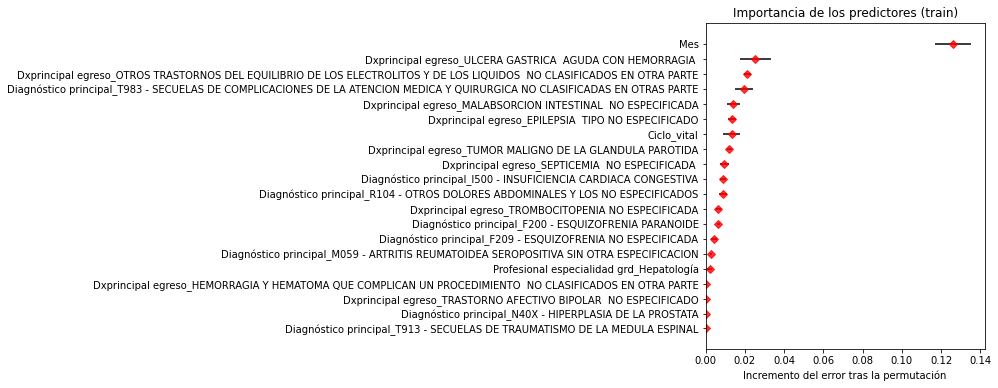

In [188]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

Se seleccionan 16 variables que más aportan valor al estudio, debido a que al seleccionar 20 variables con K best, se encuentra que 4 variables no ofrecen un valor en 'importances_mean'. Por lo que se decide trabajar con las 16 primeras. 

In [189]:
X2 = X[['Mes', 'Dxprincipal egreso_ULCERA GASTRICA  AGUDA CON HEMORRAGIA ',
        'Diagnóstico principal_T983 - SECUELAS DE COMPLICACIONES DE LA ATENCION MEDICA Y QUIRURGICA NO CLASIFICADAS EN OTRAS PARTE',
        'Dxprincipal egreso_OTROS TRASTORNOS DEL EQUILIBRIO DE LOS ELECTROLITOS Y DE LOS LIQUIDOS  NO CLASIFICADOS EN OTRA PARTE',
        'Dxprincipal egreso_MALABSORCION INTESTINAL  NO ESPECIFICADA', 'Diagnóstico principal_R104 - OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS',
        'Dxprincipal egreso_EPILEPSIA  TIPO NO ESPECIFICADO', 'Ciclo_vital',
        'Dxprincipal egreso_TUMOR MALIGNO DE LA GLANDULA PAROTIDA', 'Diagnóstico principal_I500 - INSUFICIENCIA CARDIACA CONGESTIVA',
        'Dxprincipal egreso_TROMBOCITOPENIA NO ESPECIFICADA', 'Dxprincipal egreso_SEPTICEMIA  NO ESPECIFICADA ',
        'Diagnóstico principal_F200 - ESQUIZOFRENIA PARANOIDE', 'Diagnóstico principal_F209 - ESQUIZOFRENIA NO ESPECIFICADA',
        'Diagnóstico principal_M059 - ARTRITIS REUMATOIDEA SEROPOSITIVA SIN OTRA ESPECIFICACION',
        'Profesional especialidad grd_Hepatología']]

In [190]:
modelo = m_rf
modelo.fit(X,y)
print(modelo.feature_importances_)

[0.02 0.01 0.02 0.02 0.01 0.01 0.03 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.02 0.02 0.01 0.   0.   0.02 0.02 0.01 0.01 0.01 0.02 0.02 0.02 0.03
 0.02 0.   0.08 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.  

In [191]:
#Selección de variables por kBest, se muestran las 50 más relevantes
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
kBest = SelectKBest(score_func = f_classif, k = 50)
fit = kBest.fit(X,y)
var_names = fit.get_feature_names_out()
var_names

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [ 29 293 536 543] are constant.

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



array(['Edad', 'Perímetro muslo', 'Índice de fragilidad groningen', 'Mes',
       'Ciclo_vital',
       'Dxprincipal egreso_BLOQUEO AURICULOVENTRICULAR COMPLETO',
       'Dxprincipal egreso_EPILEPSIA  TIPO NO ESPECIFICADO',
       'Dxprincipal egreso_HEMORRAGIA Y HEMATOMA QUE COMPLICAN UN PROCEDIMIENTO  NO CLASIFICADOS EN OTRA PARTE',
       'Dxprincipal egreso_INFARTO AGUDO DEL MIOCARDIO  SIN OTRA ESPECIFICACION ',
       'Dxprincipal egreso_INFECCION CONSECUTIVA A PROCEDIMIENTO  NO CLASIFICADA EN OTRA PARTE',
       'Dxprincipal egreso_INFECCION DE MUNON DE AMPUTACION',
       'Dxprincipal egreso_INFECCION DE VIAS URINARIAS  SITIO NO ESPECIFICADO ',
       'Dxprincipal egreso_INFECCION Y REACCION INFLAMATORIA DEBIDAS A PROTESIS ARTICULAR INTERNA',
       'Dxprincipal egreso_MALABSORCION INTESTINAL  NO ESPECIFICADA',
       'Dxprincipal egreso_MELANOMA MALIGNO DEL MIEMBRO SUPERIOR  INCLUIDA EL HOMBRO',
       'Dxprincipal egreso_OTRAS CIRROSIS DEL HIGADO Y LAS NO ESPECIFICADAS ',
    

In [192]:
X3=X[var_names]

In [193]:
var_names=sel_variables(modelos,X,y,SelectFromModel,np,threshold="mean")
var_names.shape

(168,)

In [194]:
X4= X[var_names]

In [195]:
#construcción de dataFrame con medidadas de desempeño de difererentes modelos, para cada uno de los grupos de variables
score_1 = medir_modelos( modelos, "neg_mean_absolute_percentage_error",X,y, kfold, cross_val_score,pd)
score_2 = medir_modelos( modelos, "neg_mean_absolute_percentage_error",X2,y, kfold, cross_val_score,pd)
score_3 = medir_modelos( modelos, "neg_mean_absolute_percentage_error",X3,y, kfold, cross_val_score,pd)
score_4 = medir_modelos( modelos, "neg_mean_absolute_percentage_error",X4,y, kfold, cross_val_score,pd)

In [196]:
score_1['Type'] = 'All' #desempeño con todas las variables
score_2['Type'] = '16_v' #desempeño de 16 variables
score_3['Type'] = '50_v' # desempeño de 50 variables
score_4['Type'] = '166_v' # desempeño de 166 variables

In [197]:
scoreF = pd.concat([score_1, score_2, score_3, score_4 ], axis = 0) #union de todos los desempeños por modelos

In [198]:
#BoxPlots de todos los modelos por grupo de variables
fig = go.Figure()
for column in scoreF.columns[:-1]:
    fig.add_trace(go.Box(
        y = scoreF[column],
        x = scoreF.iloc[:,-1],
        name = column
    ))
fig.update_layout(
    yaxis_title = 'score',
    boxmode = 'group',
    colorway = px.colors.sequential.ice
)

fig.show()

In [199]:
mape_df=medir_modelos(modelos,"neg_mean_absolute_percentage_error",X,y,10, cross_val_score, pd)
rmse_df= medir_modelos(modelos,"neg_root_mean_squared_error",X,y,10, cross_val_score, pd)

In [200]:
mape_varsel=medir_modelos(modelos,"neg_mean_absolute_percentage_error",X2,y,10, cross_val_score, pd)
rmse_varsel=medir_modelos(modelos,"neg_root_mean_squared_error",X2,y,10, cross_val_score, pd)

Index(['reg_lineal', 'decision_tree', 'random_forest', 'gradient_boosting'], dtype='object')

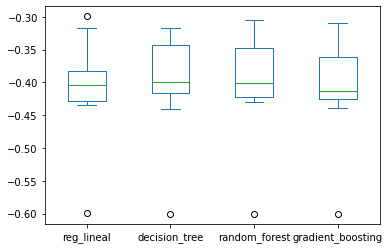

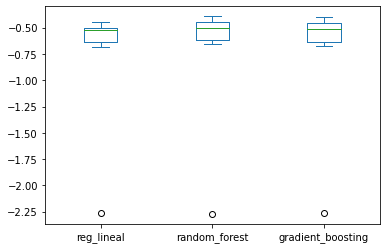

In [201]:
mape=pd.concat([mape_df,mape_varsel],axis=1)
mape.columns=['rl', 'dt', 'rf', 'gb',
       'rl_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']

rmse=pd.concat([rmse_df,rmse_varsel],axis=1)
rmse.columns=['rl', 'dt', 'rf', 'gb',
       'rl_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']

mape_varsel.plot(kind='box')
rmse_varsel[["reg_lineal", "random_forest","gradient_boosting"]].plot(kind='box')
rmse_varsel.columns

Index(['reg_lineal', 'decision_tree', 'random_forest', 'gradient_boosting'], dtype='object')

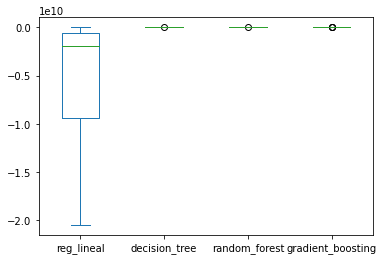

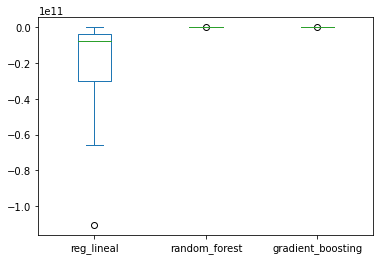

In [202]:
mape_df.plot(kind='box')
rmse_df[["reg_lineal","random_forest","gradient_boosting"]].plot(kind='box')
rmse_varsel.columns

##**Afinamiento de hiperparámetros**

Se realiza el ajuste de hiperparámetros para dos modelos, los cuales son: Random Forest Y Decision Tree, debido a que presentan un buen desempeño en la selección de modelos mostrada anteriormente. Cabe mencionar, que a pesar de que el costo computacional es mayor, respecto a hacer ajuste de hiperparámetros, se decide hacerlo de esta forma para seleccionar el que mejor comportamiento tenga. 

Random Forest

In [203]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X2, y, test_size=test_size,random_state=seed) #partir datos en entrenamiento y prueba
regr = m_rf #creación del modelo
regr.fit(X_train, Y_train) # entrenamiento del mdoelo 
predicted = regr.predict(X_test)

In [204]:
# Grid de hiperparámetros evaluados para Random Forest 
# ------------------------------------------------------------------------------
param_grid = {'n_estimators': [3, 100, 150, 500],
              'max_features': [5, 7, 9, 20],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ------------------------------------------------------------------------------
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = Y_train)

# Resultados
# ------------------------------------------------------------------------------
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


240 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
42,10,9,150,-0.812574,0.094473,-0.671121,0.014386
43,10,9,500,-0.812977,0.094510,-0.670365,0.014284
41,10,9,100,-0.813070,0.094874,-0.671448,0.014710
39,10,7,500,-0.813439,0.094995,-0.670658,0.014304


In [205]:
# Mejores hiperparámetros por validación cruzada para Random Forest 
# --------------------------------------------------------------------
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 10, 'max_features': 9, 'n_estimators': 150} : -0.8125741176009543 neg_root_mean_squared_error


In [206]:
modelo_finalRF = grid.best_estimator_

Decision Tree

In [207]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X2, y, test_size=test_size,random_state=seed) #partir datos en entrenamiento y prueba
regr = m_rtree #creación del modelo
regr.fit(X_train, Y_train) # entrenamiento del mdoelo 
predicted = regr.predict(X_test)

In [208]:
# Grid de hiperparámetros evaluados
#--------------------------------------------------------------------
param_grid = {'min_samples_split' : [2,3,4,5],
              'min_samples_leaf' : [1,2,3],
              'max_depth'   : [None, 3, 10, 20]
              
             }

# Búsqueda por grid search con validación cruzada
# ------------------------------------------------------------------------------
grid = GridSearchCV(
        estimator  = tree.DecisionTreeRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = Y_train)

# Resultados
# ------------------------------------------------------------------------------
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score,mean_train_score,std_train_score
20,3,3,2,-0.82032,0.100523,-0.791546,0.02322
21,3,3,3,-0.82032,0.100523,-0.791546,0.02322
22,3,3,4,-0.82032,0.100523,-0.791546,0.02322
23,3,3,5,-0.82032,0.100523,-0.791546,0.02322


In [209]:
# Mejores hiperparámetros por validación cruzada
# --------------------------------------------------------------------
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2} : -0.8203197650129662 neg_root_mean_squared_error


In [210]:
modelo_finalDT = grid.best_estimator_

 
## **Evaluar modelos afinados**

In [211]:
#####Evaluar métrica de entrenamiento y evaluación para mirar sobre ajuste ####

eval=cross_validate(modelo_finalRF,X2,y,cv=5,scoring="neg_root_mean_squared_error",return_train_score=True)
eval2=cross_validate(modelo_finalDT,X2,y,cv=5,scoring="neg_root_mean_squared_error",return_train_score=True)

In [212]:
train_rf=pd.DataFrame(eval['train_score'])
test_rf=pd.DataFrame(eval['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']

train_dt=pd.DataFrame(eval2['train_score'])
test_dt=pd.DataFrame(eval2['test_score'])
train_test_dt=pd.concat([train_dt, test_dt],axis=1)
train_test_dt.columns=['train_score','test_score']

In [213]:
train_test_rf

,train_score,test_score
0,-0.315641,-1.784055
1,-0.717691,-0.522609
2,-0.724067,-0.519530
3,-0.720557,-0.536656
4,-0.729040,-0.477013


In [214]:
train_test_dt

,train_score,test_score
0,-0.322506,-1.799044
1,-0.818395,-0.524421
2,-0.820755,-0.552129
3,-0.820547,-0.547684
4,-0.821731,-0.544826


In [215]:
train_test_rf["test_score"].mean()

-0.7679725952715573

In [216]:
train_test_dt["test_score"].mean()

-0.7936207018690091

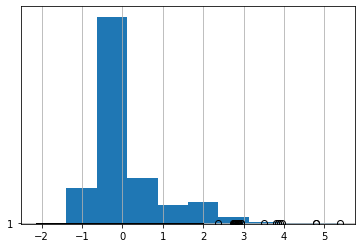

In [217]:
predictions=cross_val_predict(modelo_finalRF,X2,y,cv=5)

pred=pd.DataFrame(predictions,columns=['pred'])
pdy=y.to_frame()
error=pdy['Hospitalizaciones']-pred['pred']
error.hist()

plt.boxplot(error,vert=False)
plt.show()

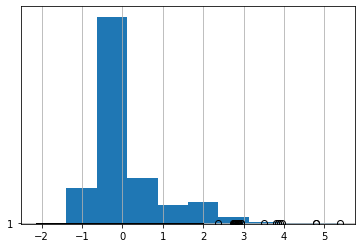

In [218]:
predictions2=cross_val_predict(modelo_finalDT,X2,y,cv=5)

pred2=pd.DataFrame(predictions2,columns=['pred'])
error2=pdy['Hospitalizaciones']-pred['pred']
error2.hist()


plt.boxplot(error2,vert=False)
plt.show()

**Importancia de variables**

In [219]:
importancia = permutation_importance(
                estimator    = modelo_finalRF,
                X            = X_train,
                y            = Y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
0,0.115237,0.009103,Mes
1,0.024122,0.006454,Dxprincipal egreso_ULCERA GASTRICA AGUDA CON ...
2,0.019800,0.004437,Diagnóstico principal_T983 - SECUELAS DE COMPL...
3,0.019344,0.001375,Dxprincipal egreso_OTROS TRASTORNOS DEL EQUILI...
5,0.013308,0.002892,Diagnóstico principal_R104 - OTROS DOLORES ABD...
6,0.013152,0.002661,Dxprincipal egreso_EPILEPSIA TIPO NO ESPECIFI...
4,0.012367,0.003355,Dxprincipal egreso_MALABSORCION INTESTINAL NO...
8,0.011294,0.001036,Dxprincipal egreso_TUMOR MALIGNO DE LA GLANDUL...
7,0.009871,0.003364,Ciclo_vital
9,0.008243,0.001322,Diagnóstico principal_I500 - INSUFICIENCIA CAR...


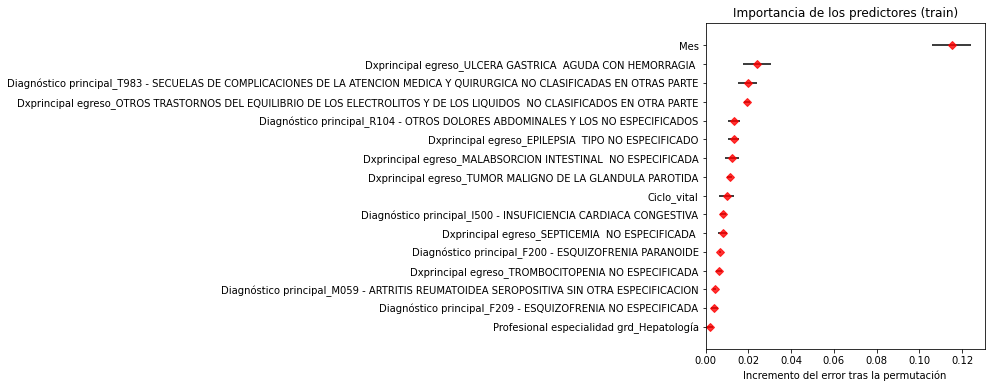

In [220]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

##**Despliegue**

In [221]:
x_pos = X2
model_final_RF_POS = modelo_finalRF

In [222]:
#Exportar y guardar
joblib.dump(model_final_RF_POS, "model_final_RF_POS.pkl")

['model_final_RF_POS.pkl']

In [223]:
##Cargar modelo y predecir
model_final = joblib.load("model_final_RF_POS.pkl")
predicciones=model_final.predict(x_pos)


In [224]:
pd_pred=pd.DataFrame(predicciones[:873])
df_ID = base_completa_pos[['Nrodoc']]
hosp_pred_pos=pd.concat([df_ID, pd_pred],axis=1)
hosp_pred_pos.rename(columns = {0 : 'Hospitalizaciones'}, inplace = True)
hosp_pred_pos

,Nrodoc,Hospitalizaciones
0,312214,4.988201
1,311890,4.547918
2,306827,1.804162
3,307942,1.550681
4,308140,1.804162
...,...,...
868,313704,1.804162
869,313418,1.440056
870,312815,1.804162
871,311775,1.239306


In [225]:
canPos = hosp_pred_pos.query('Hospitalizaciones >4')

In [226]:
canPos

,Nrodoc,Hospitalizaciones
0,312214,4.988201
1,311890,4.547918


In [227]:
canPos['Hospitalizaciones'].mean()

4.768059447033197

In [228]:
canPos

,Nrodoc,Hospitalizaciones
0,312214,4.988201
1,311890,4.547918


In [230]:
#Exportar
hosp_pred_pos.to_excel("/content/drive/Shareddrives/Analítica/NIVEL 3/Salud/hospitalizaciones_pos.xlsx") # guardamos el archivo como hospitalizaciones_pos.xlsx
files.download('/content/drive/Shareddrives/Analítica/NIVEL 3/Salud/hospitalizaciones_pos.xlsx') # descargamos el archivo en nuestra maquina local

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>